In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [6]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [7]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [8]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [9]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [10]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
sensor2 = sensor2.reshape(41, 16, 1)

In [14]:
sensor3 = sensor3.reshape(41, 16, 1)

In [15]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [16]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [17]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [18]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=32, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=32, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=32, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [19]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 8ms/step - loss: 2.0369 - rmse: 1.4036
Epoch 2/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.9523 - rmse: 1.3731
Epoch 3/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8960 - rmse: 1.3525
Epoch 4/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8293 - rmse: 1.3276
Epoch 5/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7539 - rmse: 1.2989
Epoch 6/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6977 - rmse: 1.2772
Epoch 7/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6547 - rmse: 1.2602
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6363 - rmse: 1.2529
Epoch 9/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6139 - rmse: 1.2439
Epoch 10/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6010 - rmse: 1.2387
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 8ms/step - loss: 0.7524 - rmse: 0.8298
Epoch 87/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7419 - rmse: 0.8235
Epoch 88/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7368 - rmse: 0.8204
Epoch 89/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7377 - rmse: 0.8210
Epoch 90/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7279 - rmse: 0.8150
Epoch 91/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7283 - rmse: 0.8153
Epoch 92/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7229 - rmse: 0.8119
Epoch 93/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7209 - rmse: 0.8107
Epoch 94/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7138 - rmse: 0.8064
Epoch 95/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7084 - rmse: 0.8030
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 8ms/step - loss: 0.4144 - rmse: 0.5944
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4101 - rmse: 0.5908
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4085 - rmse: 0.5895
Epoch 173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4086 - rmse: 0.5896
Epoch 174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4051 - rmse: 0.5867
Epoch 175/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4003 - rmse: 0.5826
Epoch 176/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4035 - rmse: 0.5853
Epoch 177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4005 - rmse: 0.5828
Epoch 178/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3975 - rmse: 0.5802
Epoch 179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3921 - rmse: 0.5756
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.2672 - rmse: 0.4567
Epoch 255/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2638 - rmse: 0.4530
Epoch 256/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2646 - rmse: 0.4539
Epoch 257/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2625 - rmse: 0.4516
Epoch 258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2641 - rmse: 0.4534
Epoch 259/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2599 - rmse: 0.4488
Epoch 260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2581 - rmse: 0.4468
Epoch 261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2582 - rmse: 0.4470
Epoch 262/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2570 - rmse: 0.4456
Epoch 263/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2552 - rmse: 0.4436
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.1939 - rmse: 0.3708
Epoch 339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1953 - rmse: 0.3727
Epoch 340/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1920 - rmse: 0.3683
Epoch 341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1943 - rmse: 0.3715
Epoch 342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1934 - rmse: 0.3703
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1921 - rmse: 0.3685
Epoch 344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1928 - rmse: 0.3695
Epoch 345/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1944 - rmse: 0.3718
Epoch 346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1900 - rmse: 0.3658
Epoch 347/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1897 - rmse: 0.3654
Epoch 348/10000
2/2 [=====================

2/2 [==============================] - 0s 11ms/step - loss: 0.1517 - rmse: 0.3119
Epoch 423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1510 - rmse: 0.3108
Epoch 424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1487 - rmse: 0.3071
Epoch 425/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1529 - rmse: 0.3140
Epoch 426/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1499 - rmse: 0.3091
Epoch 427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1478 - rmse: 0.3059
Epoch 428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1469 - rmse: 0.3045
Epoch 429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1484 - rmse: 0.3069
Epoch 430/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1463 - rmse: 0.3035
Epoch 431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1466 - rmse: 0.3040
Epoch 432/10000
2/2 [====================

2/2 [==============================] - 0s 11ms/step - loss: 0.1195 - rmse: 0.2588
Epoch 507/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1216 - rmse: 0.2630
Epoch 508/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1191 - rmse: 0.2581
Epoch 509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1186 - rmse: 0.2573
Epoch 510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1184 - rmse: 0.2569
Epoch 511/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1181 - rmse: 0.2564
Epoch 512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1193 - rmse: 0.2588
Epoch 513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1200 - rmse: 0.2602
Epoch 514/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1174 - rmse: 0.2552
Epoch 515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1182 - rmse: 0.2568
Epoch 516/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 0.0991 - rmse: 0.2201
Epoch 591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0977 - rmse: 0.2169
Epoch 592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0980 - rmse: 0.2176
Epoch 593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0968 - rmse: 0.2149
Epoch 594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0972 - rmse: 0.2160
Epoch 595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0964 - rmse: 0.2140
Epoch 596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0972 - rmse: 0.2160
Epoch 597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0968 - rmse: 0.2151
Epoch 598/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0953 - rmse: 0.2116
Epoch 599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0952 - rmse: 0.2115
Epoch 600/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 0.0798 - rmse: 0.1756
Epoch 675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0796 - rmse: 0.1750
Epoch 676/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0797 - rmse: 0.1752
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0833 - rmse: 0.1854
Epoch 678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0796 - rmse: 0.1752
Epoch 679/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0816 - rmse: 0.1808
Epoch 680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0794 - rmse: 0.1746
Epoch 681/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0822 - rmse: 0.1827
Epoch 682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0792 - rmse: 0.1741
Epoch 683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0789 - rmse: 0.1734
Epoch 684/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 0.0706 - rmse: 0.1524
Epoch 759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0680 - rmse: 0.1436
Epoch 760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0691 - rmse: 0.1475
Epoch 761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0720 - rmse: 0.1570
Epoch 762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0681 - rmse: 0.1441
Epoch 763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0683 - rmse: 0.1448
Epoch 764/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0683 - rmse: 0.1449
Epoch 765/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0677 - rmse: 0.1427
Epoch 766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0703 - rmse: 0.1517
Epoch 767/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0673 - rmse: 0.1415
Epoch 768/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.0619 - rmse: 0.1264
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0592 - rmse: 0.1153
Epoch 844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0620 - rmse: 0.1271
Epoch 845/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0589 - rmse: 0.1143
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0592 - rmse: 0.1155
Epoch 847/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0589 - rmse: 0.1144
Epoch 848/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0587 - rmse: 0.1137
Epoch 849/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0583 - rmse: 0.1117
Epoch 850/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0584 - rmse: 0.1124
Epoch 851/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0583 - rmse: 0.1121
Epoch 852/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.0562 - rmse: 0.1083
Epoch 927/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0527 - rmse: 0.0904
Epoch 928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0526 - rmse: 0.0903
Epoch 929/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0530 - rmse: 0.0927
Epoch 930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0547 - rmse: 0.1015
Epoch 931/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0520 - rmse: 0.0871
Epoch 932/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0541 - rmse: 0.0983
Epoch 933/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0522 - rmse: 0.0886
Epoch 934/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0522 - rmse: 0.0887
Epoch 935/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0528 - rmse: 0.0920
Epoch 936/10000
2/2 [===================

Epoch 1010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0488 - rmse: 0.0748
Epoch 1011/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0485 - rmse: 0.0731
Epoch 1012/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0483 - rmse: 0.0719
Epoch 1013/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0483 - rmse: 0.0717
Epoch 1014/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0512 - rmse: 0.0901
Epoch 1015/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0482 - rmse: 0.0719
Epoch 1016/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0484 - rmse: 0.0733
Epoch 1017/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0487 - rmse: 0.0749
Epoch 1018/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0484 - rmse: 0.0735
Epoch 1019/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0481 - rmse: 0.0713
Epoch 1020/10

2/2 [==============================] - 0s 8ms/step - loss: 0.0459 - rmse: 0.0630
Epoch 1094/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0460 - rmse: 0.0644
Epoch 1095/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0461 - rmse: 0.0649
Epoch 1096/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0458 - rmse: 0.0629
Epoch 1097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0457 - rmse: 0.0624
Epoch 1098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0454 - rmse: 0.0603
Epoch 1099/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0470 - rmse: 0.0725
Epoch 1100/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0455 - rmse: 0.0607
Epoch 1101/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0454 - rmse: 0.0606
Epoch 1102/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0453 - rmse: 0.0592
Epoch 1103/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0454 - rmse: 0.0689
Epoch 1177/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0436 - rmse: 0.0540
Epoch 1178/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0438 - rmse: 0.0564
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0438 - rmse: 0.0565
Epoch 1180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0436 - rmse: 0.0550
Epoch 1181/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0434 - rmse: 0.0527
Epoch 1182/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0432 - rmse: 0.0514
Epoch 1183/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0449 - rmse: 0.0656
Epoch 1184/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0437 - rmse: 0.0556
Epoch 1185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0434 - rmse: 0.0537
Epoch 1186/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0415 - rmse: 0.0447
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0428 - rmse: 0.0576
Epoch 1261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0415 - rmse: 0.0453
Epoch 1262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0430 - rmse: 0.0597
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0415 - rmse: 0.0449
Epoch 1264/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0416 - rmse: 0.0460
Epoch 1265/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0428 - rmse: 0.0584
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0415 - rmse: 0.0459
Epoch 1267/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0420 - rmse: 0.0511
Epoch 1268/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0423 - rmse: 0.0540
Epoch 1269/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0402 - rmse: 0.0422
Epoch 1343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0416 - rmse: 0.0562
Epoch 1344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0409 - rmse: 0.0506
Epoch 1345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0415 - rmse: 0.0563
Epoch 1346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0439 - rmse: 0.0743
Epoch 1347/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0415 - rmse: 0.0560
Epoch 1348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0434 - rmse: 0.0714
Epoch 1349/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0404 - rmse: 0.0455
Epoch 1350/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0406 - rmse: 0.0476
Epoch 1351/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0400 - rmse: 0.0418
Epoch 1352/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0409 - rmse: 0.0594
Epoch 1426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0421 - rmse: 0.0691
Epoch 1427/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0394 - rmse: 0.0450
Epoch 1428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0400 - rmse: 0.0519
Epoch 1429/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0395 - rmse: 0.0473
Epoch 1430/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0392 - rmse: 0.0440
Epoch 1431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0391 - rmse: 0.0425
Epoch 1432/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0397 - rmse: 0.0498
Epoch 1433/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0393 - rmse: 0.0454
Epoch 1434/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0393 - rmse: 0.0453
Epoch 1435/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0377 - rmse: 0.0368
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0406 - rmse: 0.0656
Epoch 1510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - rmse: 0.0424
Epoch 1511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - rmse: 0.0339
Epoch 1512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0403 - rmse: 0.0634
Epoch 1513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - rmse: 0.0390
Epoch 1514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - rmse: 0.0455
Epoch 1515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0376 - rmse: 0.0366
Epoch 1516/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0393 - rmse: 0.0554
Epoch 1517/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0385 - rmse: 0.0478
Epoch 1518/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0368 - rmse: 0.0381
Epoch 1592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - rmse: 0.0328
Epoch 1593/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0362 - rmse: 0.0293
Epoch 1594/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0385 - rmse: 0.0566
Epoch 1595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - rmse: 0.0365
Epoch 1596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - rmse: 0.0319
Epoch 1597/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0365 - rmse: 0.0349
Epoch 1598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - rmse: 0.0565
Epoch 1599/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0365 - rmse: 0.0348
Epoch 1600/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0365 - rmse: 0.0345
Epoch 1601/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - rmse: 0.0420
Epoch 1675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - rmse: 0.0426
Epoch 1676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0362 - rmse: 0.0427
Epoch 1677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - rmse: 0.0381
Epoch 1678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0358 - rmse: 0.0380
Epoch 1679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - rmse: 0.0306
Epoch 1680/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0356 - rmse: 0.0350
Epoch 1681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0379 - rmse: 0.0593
Epoch 1682/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - rmse: 0.0559
Epoch 1683/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0358 - rmse: 0.0379
Epoch 1684/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - rmse: 0.0447
Epoch 1758/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0350 - rmse: 0.0387
Epoch 1759/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0354 - rmse: 0.0434
Epoch 1760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0344 - rmse: 0.0309
Epoch 1761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0356 - rmse: 0.0463
Epoch 1762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - rmse: 0.0354
Epoch 1763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0346 - rmse: 0.0341
Epoch 1764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0378 - rmse: 0.0661
Epoch 1765/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - rmse: 0.0377
Epoch 1766/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0345 - rmse: 0.0329
Epoch 1767/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0339 - rmse: 0.0357
Epoch 1841/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0338 - rmse: 0.0346
Epoch 1842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0353 - rmse: 0.0517
Epoch 1843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - rmse: 0.0483
Epoch 1844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0336 - rmse: 0.0325
Epoch 1845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0333 - rmse: 0.0279
Epoch 1846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0335 - rmse: 0.0313
Epoch 1847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0332 - rmse: 0.0259
Epoch 1848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0335 - rmse: 0.0314
Epoch 1849/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0347 - rmse: 0.0462
Epoch 1850/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0326 - rmse: 0.0293
Epoch 1924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0327 - rmse: 0.0304
Epoch 1925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0326 - rmse: 0.0300
Epoch 1926/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0325 - rmse: 0.0286
Epoch 1927/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0324 - rmse: 0.0263
Epoch 1928/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0337 - rmse: 0.0444
Epoch 1929/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0342 - rmse: 0.0503
Epoch 1930/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0326 - rmse: 0.0304
Epoch 1931/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0323 - rmse: 0.0258
Epoch 1932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0339 - rmse: 0.0471
Epoch 1933/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0324 - rmse: 0.0387
Epoch 2007/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0320 - rmse: 0.0329
Epoch 2008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0318 - rmse: 0.0306
Epoch 2009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0316 - rmse: 0.0272
Epoch 2010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - rmse: 0.0599
Epoch 2011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0316 - rmse: 0.0266
Epoch 2012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - rmse: 0.0550
Epoch 2013/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0315 - rmse: 0.0256
Epoch 2014/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0315 - rmse: 0.0260
Epoch 2015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0313 - rmse: 0.0224
Epoch 2016/10000
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 0.0309 - rmse: 0.0284
Epoch 2090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0308 - rmse: 0.0268
Epoch 2091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0309 - rmse: 0.0277
Epoch 2092/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0308 - rmse: 0.0261
Epoch 2093/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0306 - rmse: 0.0239
Epoch 2094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0311 - rmse: 0.0324
Epoch 2095/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0309 - rmse: 0.0298
Epoch 2096/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0309 - rmse: 0.0296
Epoch 2097/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0307 - rmse: 0.0253
Epoch 2098/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0314 - rmse: 0.0365
Epoch 2099/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0310 - rmse: 0.0415
Epoch 2173/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0305 - rmse: 0.0346
Epoch 2174/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0298 - rmse: 0.0233
Epoch 2175/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0301 - rmse: 0.0286
Epoch 2176/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0297 - rmse: 0.0199
Epoch 2177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0305 - rmse: 0.0347
Epoch 2178/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0304 - rmse: 0.0342
Epoch 2179/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0297 - rmse: 0.0208
Epoch 2180/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0302 - rmse: 0.0306
Epoch 2181/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0305 - rmse: 0.0359
Epoch 2182/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0291 - rmse: 0.0236
Epoch 2256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0311 - rmse: 0.0510
Epoch 2257/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0292 - rmse: 0.0254
Epoch 2258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0290 - rmse: 0.0213
Epoch 2259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0292 - rmse: 0.0259
Epoch 2260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0291 - rmse: 0.0243
Epoch 2261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0289 - rmse: 0.0209
Epoch 2262/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0293 - rmse: 0.0289
Epoch 2263/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0292 - rmse: 0.0264
Epoch 2264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0300 - rmse: 0.0398
Epoch 2265/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0284 - rmse: 0.0254
Epoch 2339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0286 - rmse: 0.0293
Epoch 2340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0309 - rmse: 0.0556
Epoch 2341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0283 - rmse: 0.0232
Epoch 2342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0287 - rmse: 0.0305
Epoch 2343/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0286 - rmse: 0.0301
Epoch 2344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0298 - rmse: 0.0456
Epoch 2345/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0283 - rmse: 0.0251
Epoch 2346/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0290 - rmse: 0.0357
Epoch 2347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0285 - rmse: 0.0282
Epoch 2348/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0287 - rmse: 0.0405
Epoch 2422/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0281 - rmse: 0.0335
Epoch 2423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0281 - rmse: 0.0336
Epoch 2424/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0284 - rmse: 0.0378
Epoch 2425/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0278 - rmse: 0.0290
Epoch 2426/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0279 - rmse: 0.0301
Epoch 2427/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0282 - rmse: 0.0344
Epoch 2428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0275 - rmse: 0.0224
Epoch 2429/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0287 - rmse: 0.0419
Epoch 2430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0274 - rmse: 0.0215
Epoch 2431/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0269 - rmse: 0.0239
Epoch 2505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0271 - rmse: 0.0288
Epoch 2506/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0279 - rmse: 0.0402
Epoch 2507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0274 - rmse: 0.0329
Epoch 2508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0276 - rmse: 0.0364
Epoch 2509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0280 - rmse: 0.0412
Epoch 2510/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0268 - rmse: 0.0241
Epoch 2511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0271 - rmse: 0.0293
Epoch 2512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0291 - rmse: 0.0533
Epoch 2513/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0273 - rmse: 0.0333
Epoch 2514/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0264 - rmse: 0.0292
Epoch 2588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0275 - rmse: 0.0440
Epoch 2589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0260 - rmse: 0.0198
Epoch 2590/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0272 - rmse: 0.0407
Epoch 2591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0268 - rmse: 0.0358
Epoch 2592/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0264 - rmse: 0.0295
Epoch 2593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0260 - rmse: 0.0223
Epoch 2594/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0269 - rmse: 0.0367
Epoch 2595/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0259 - rmse: 0.0206
Epoch 2596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0260 - rmse: 0.0212
Epoch 2597/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0275 - rmse: 0.0513
Epoch 2671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0256 - rmse: 0.0271
Epoch 2672/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0255 - rmse: 0.0255
Epoch 2673/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0255 - rmse: 0.0260
Epoch 2674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0280 - rmse: 0.0557
Epoch 2675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0275 - rmse: 0.0517
Epoch 2676/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0252 - rmse: 0.0199
Epoch 2677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0254 - rmse: 0.0239
Epoch 2678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0253 - rmse: 0.0207
Epoch 2679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0278 - rmse: 0.0543
Epoch 2680/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0262 - rmse: 0.0447
Epoch 2754/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0247 - rmse: 0.0231
Epoch 2755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0249 - rmse: 0.0268
Epoch 2756/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0253 - rmse: 0.0330
Epoch 2757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0268 - rmse: 0.0516
Epoch 2758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0246 - rmse: 0.0197
Epoch 2759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0246 - rmse: 0.0206
Epoch 2760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0254 - rmse: 0.0354
Epoch 2761/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0249 - rmse: 0.0275
Epoch 2762/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0260 - rmse: 0.0438
Epoch 2763/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0243 - rmse: 0.0272
Epoch 2837/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0244 - rmse: 0.0298
Epoch 2838/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0239 - rmse: 0.0208
Epoch 2839/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0252 - rmse: 0.0408
Epoch 2840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0239 - rmse: 0.0209
Epoch 2841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0243 - rmse: 0.0280
Epoch 2842/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0243 - rmse: 0.0288
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0241 - rmse: 0.0246
Epoch 2844/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0239 - rmse: 0.0202
Epoch 2845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0246 - rmse: 0.0332
Epoch 2846/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0238 - rmse: 0.0297
Epoch 2920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0242 - rmse: 0.0366
Epoch 2921/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0241 - rmse: 0.0347
Epoch 2922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0241 - rmse: 0.0351
Epoch 2923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0260 - rmse: 0.0565
Epoch 2924/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0235 - rmse: 0.0265
Epoch 2925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0243 - rmse: 0.0388
Epoch 2926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0233 - rmse: 0.0227
Epoch 2927/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0244 - rmse: 0.0397
Epoch 2928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0255 - rmse: 0.0518
Epoch 2929/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0244 - rmse: 0.0470
Epoch 3003/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0228 - rmse: 0.0251
Epoch 3004/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0231 - rmse: 0.0303
Epoch 3005/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0226 - rmse: 0.0191
Epoch 3006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0227 - rmse: 0.0229
Epoch 3007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0237 - rmse: 0.0390
Epoch 3008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0228 - rmse: 0.0250
Epoch 3009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0229 - rmse: 0.0264
Epoch 3010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0233 - rmse: 0.0330
Epoch 3011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0226 - rmse: 0.0208
Epoch 3012/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0226 - rmse: 0.0315
Epoch 3086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0224 - rmse: 0.0291
Epoch 3087/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0223 - rmse: 0.0269
Epoch 3088/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0234 - rmse: 0.0434
Epoch 3089/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0223 - rmse: 0.0276
Epoch 3090/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0224 - rmse: 0.0296
Epoch 3091/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0221 - rmse: 0.0236
Epoch 3092/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0224 - rmse: 0.0293
Epoch 3093/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0224 - rmse: 0.0298
Epoch 3094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0221 - rmse: 0.0234
Epoch 3095/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0219 - rmse: 0.0305
Epoch 3169/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0223 - rmse: 0.0361
Epoch 3170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0213 - rmse: 0.0198
Epoch 3171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0224 - rmse: 0.0386
Epoch 3172/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0213 - rmse: 0.0192
Epoch 3173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0213 - rmse: 0.0196
Epoch 3174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0215 - rmse: 0.0233
Epoch 3175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0219 - rmse: 0.0314
Epoch 3176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0224 - rmse: 0.0382
Epoch 3177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0213 - rmse: 0.0197
Epoch 3178/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0210 - rmse: 0.0244
Epoch 3252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0213 - rmse: 0.0314
Epoch 3253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0215 - rmse: 0.0346
Epoch 3254/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0209 - rmse: 0.0229
Epoch 3255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0213 - rmse: 0.0307
Epoch 3256/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0209 - rmse: 0.0243
Epoch 3257/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0210 - rmse: 0.0259
Epoch 3258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0208 - rmse: 0.0219
Epoch 3259/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0215 - rmse: 0.0345
Epoch 3260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0217 - rmse: 0.0372
Epoch 3261/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0204 - rmse: 0.0257
Epoch 3335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0221 - rmse: 0.0484
Epoch 3336/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0216 - rmse: 0.0425
Epoch 3337/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0222 - rmse: 0.0494
Epoch 3338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0212 - rmse: 0.0386
Epoch 3339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0210 - rmse: 0.0356
Epoch 3340/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0227 - rmse: 0.0548
Epoch 3341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0207 - rmse: 0.0306
Epoch 3342/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0212 - rmse: 0.0387
Epoch 3343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0216 - rmse: 0.0431
Epoch 3344/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0196 - rmse: 0.0183
Epoch 3418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0200 - rmse: 0.0273
Epoch 3419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0195 - rmse: 0.0162
Epoch 3420/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0217 - rmse: 0.0504
Epoch 3421/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0194 - rmse: 0.0143
Epoch 3422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0207 - rmse: 0.0387
Epoch 3423/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0201 - rmse: 0.0301
Epoch 3424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0200 - rmse: 0.0285
Epoch 3425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0205 - rmse: 0.0364
Epoch 3426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0197 - rmse: 0.0226
Epoch 3427/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0193 - rmse: 0.0252
Epoch 3501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0201 - rmse: 0.0375
Epoch 3502/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0191 - rmse: 0.0207
Epoch 3503/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0189 - rmse: 0.0171
Epoch 3504/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0201 - rmse: 0.0386
Epoch 3505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0195 - rmse: 0.0293
Epoch 3506/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0193 - rmse: 0.0266
Epoch 3507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0191 - rmse: 0.0215
Epoch 3508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0190 - rmse: 0.0190
Epoch 3509/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0193 - rmse: 0.0260
Epoch 3510/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0185 - rmse: 0.0184
Epoch 3584/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0183 - rmse: 0.0144
Epoch 3585/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0183 - rmse: 0.0143
Epoch 3586/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0193 - rmse: 0.0339
Epoch 3587/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0207 - rmse: 0.0504
Epoch 3588/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0194 - rmse: 0.0357
Epoch 3589/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0188 - rmse: 0.0260
Epoch 3590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0187 - rmse: 0.0251
Epoch 3591/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0205 - rmse: 0.0487
Epoch 3592/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0194 - rmse: 0.0363
Epoch 3593/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0180 - rmse: 0.0195
Epoch 3667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0186 - rmse: 0.0306
Epoch 3668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0189 - rmse: 0.0355
Epoch 3669/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0201 - rmse: 0.0498
Epoch 3670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0182 - rmse: 0.0236
Epoch 3671/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0179 - rmse: 0.0162
Epoch 3672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0188 - rmse: 0.0344
Epoch 3673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0187 - rmse: 0.0338
Epoch 3674/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0180 - rmse: 0.0197
Epoch 3675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0184 - rmse: 0.0288
Epoch 3676/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0182 - rmse: 0.0328
Epoch 3750/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0177 - rmse: 0.0250
Epoch 3751/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0178 - rmse: 0.0260
Epoch 3752/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0174 - rmse: 0.0182
Epoch 3753/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0175 - rmse: 0.0195
Epoch 3754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0176 - rmse: 0.0232
Epoch 3755/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0177 - rmse: 0.0245
Epoch 3756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0190 - rmse: 0.0436
Epoch 3757/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0185 - rmse: 0.0378
Epoch 3758/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0177 - rmse: 0.0258
Epoch 3759/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0171 - rmse: 0.0208
Epoch 3833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0170 - rmse: 0.0200
Epoch 3834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0170 - rmse: 0.0188
Epoch 3835/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0179 - rmse: 0.0355
Epoch 3836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0168 - rmse: 0.0143
Epoch 3837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0171 - rmse: 0.0212
Epoch 3838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0170 - rmse: 0.0204
Epoch 3839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0168 - rmse: 0.0135
Epoch 3840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0168 - rmse: 0.0146
Epoch 3841/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0175 - rmse: 0.0305
Epoch 3842/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0167 - rmse: 0.0234
Epoch 3916/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0164 - rmse: 0.0162
Epoch 3917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0168 - rmse: 0.0262
Epoch 3918/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0165 - rmse: 0.0194
Epoch 3919/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0179 - rmse: 0.0423
Epoch 3920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0169 - rmse: 0.0269
Epoch 3921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0167 - rmse: 0.0246
Epoch 3922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0185 - rmse: 0.0482
Epoch 3923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0166 - rmse: 0.0225
Epoch 3924/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0171 - rmse: 0.0319
Epoch 3925/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0165 - rmse: 0.0283
Epoch 3999/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0162 - rmse: 0.0230
Epoch 4000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0165 - rmse: 0.0289
Epoch 4001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0163 - rmse: 0.0239
Epoch 4002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0160 - rmse: 0.0172
Epoch 4003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0159 - rmse: 0.0159
Epoch 4004/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0161 - rmse: 0.0217
Epoch 4005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0162 - rmse: 0.0235
Epoch 4006/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0164 - rmse: 0.0280
Epoch 4007/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0160 - rmse: 0.0183
Epoch 4008/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0156 - rmse: 0.0190
Epoch 4082/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0156 - rmse: 0.0173
Epoch 4083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0155 - rmse: 0.0167
Epoch 4084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0156 - rmse: 0.0191
Epoch 4085/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0157 - rmse: 0.0215
Epoch 4086/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0166 - rmse: 0.0372
Epoch 4087/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0154 - rmse: 0.0123
Epoch 4088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0155 - rmse: 0.0158
Epoch 4089/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0158 - rmse: 0.0248
Epoch 4090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0156 - rmse: 0.0191
Epoch 4091/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0154 - rmse: 0.0229
Epoch 4165/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0158 - rmse: 0.0311
Epoch 4166/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0154 - rmse: 0.0243
Epoch 4167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0163 - rmse: 0.0388
Epoch 4168/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0165 - rmse: 0.0409
Epoch 4169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0158 - rmse: 0.0313
Epoch 4170/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0174 - rmse: 0.0508
Epoch 4171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0153 - rmse: 0.0234
Epoch 4172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0159 - rmse: 0.0331
Epoch 4173/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0157 - rmse: 0.0307
Epoch 4174/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0147 - rmse: 0.0168
Epoch 4248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0146 - rmse: 0.0143
Epoch 4249/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0152 - rmse: 0.0280
Epoch 4250/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0146 - rmse: 0.0144
Epoch 4251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0148 - rmse: 0.0202
Epoch 4252/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0150 - rmse: 0.0247
Epoch 4253/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0146 - rmse: 0.0136
Epoch 4254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0161 - rmse: 0.0411
Epoch 4255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0156 - rmse: 0.0345
Epoch 4256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0146 - rmse: 0.0164
Epoch 4257/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0149 - rmse: 0.0293
Epoch 4331/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0150 - rmse: 0.0321
Epoch 4332/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0142 - rmse: 0.0143
Epoch 4333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0152 - rmse: 0.0351
Epoch 4334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0144 - rmse: 0.0201
Epoch 4335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0147 - rmse: 0.0259
Epoch 4336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0161 - rmse: 0.0458
Epoch 4337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0149 - rmse: 0.0308
Epoch 4338/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0143 - rmse: 0.0170
Epoch 4339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0144 - rmse: 0.0196
Epoch 4340/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0138 - rmse: 0.0132
Epoch 4414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0139 - rmse: 0.0167
Epoch 4415/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0141 - rmse: 0.0225
Epoch 4416/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0140 - rmse: 0.0183
Epoch 4417/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0145 - rmse: 0.0299
Epoch 4418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0139 - rmse: 0.0159
Epoch 4419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0138 - rmse: 0.0140
Epoch 4420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0137 - rmse: 0.0110
Epoch 4421/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0142 - rmse: 0.0237
Epoch 4422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0137 - rmse: 0.0104
Epoch 4423/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0135 - rmse: 0.0155
Epoch 4497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0143 - rmse: 0.0325
Epoch 4498/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0143 - rmse: 0.0322
Epoch 4499/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0135 - rmse: 0.0156
Epoch 4500/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0145 - rmse: 0.0352
Epoch 4501/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0139 - rmse: 0.0250
Epoch 4502/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0137 - rmse: 0.0211
Epoch 4503/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0160 - rmse: 0.0527
Epoch 4504/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0152 - rmse: 0.0450
Epoch 4505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0137 - rmse: 0.0226
Epoch 4506/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0135 - rmse: 0.0254
Epoch 4580/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0133 - rmse: 0.0188
Epoch 4581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0155 - rmse: 0.0512
Epoch 4582/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0139 - rmse: 0.0325
Epoch 4583/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0135 - rmse: 0.0240
Epoch 4584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0134 - rmse: 0.0230
Epoch 4585/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.0176
Epoch 4586/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0133 - rmse: 0.0197
Epoch 4587/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0134 - rmse: 0.0223
Epoch 4588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0138 - rmse: 0.0313
Epoch 4589/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0132 - rmse: 0.0263
Epoch 4663/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0132 - rmse: 0.0249
Epoch 4664/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0133 - rmse: 0.0271
Epoch 4665/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0129 - rmse: 0.0187
Epoch 4666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0128 - rmse: 0.0153
Epoch 4667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0136 - rmse: 0.0324
Epoch 4668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0146 - rmse: 0.0449
Epoch 4669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0130 - rmse: 0.0221
Epoch 4670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0129 - rmse: 0.0204
Epoch 4671/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0138 - rmse: 0.0352
Epoch 4672/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0125 - rmse: 0.0173
Epoch 4746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0130 - rmse: 0.0287
Epoch 4747/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0128 - rmse: 0.0242
Epoch 4748/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0130 - rmse: 0.0282
Epoch 4749/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0130 - rmse: 0.0279
Epoch 4750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0124 - rmse: 0.0148
Epoch 4751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0134 - rmse: 0.0349
Epoch 4752/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0129 - rmse: 0.0258
Epoch 4753/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0132 - rmse: 0.0312
Epoch 4754/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0126 - rmse: 0.0193
Epoch 4755/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0129 - rmse: 0.0309
Epoch 4829/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0124 - rmse: 0.0213
Epoch 4830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0125 - rmse: 0.0239
Epoch 4831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0121 - rmse: 0.0146
Epoch 4832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0129 - rmse: 0.0320
Epoch 4833/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0124 - rmse: 0.0220
Epoch 4834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0122 - rmse: 0.0174
Epoch 4835/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0124 - rmse: 0.0235
Epoch 4836/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0122 - rmse: 0.0191
Epoch 4837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0124 - rmse: 0.0240
Epoch 4838/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0118 - rmse: 0.0142
Epoch 4912/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0117 - rmse: 0.0113
Epoch 4913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0121 - rmse: 0.0232
Epoch 4914/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0121 - rmse: 0.0238
Epoch 4915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0121 - rmse: 0.0221
Epoch 4916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0125 - rmse: 0.0308
Epoch 4917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0128 - rmse: 0.0349
Epoch 4918/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0120 - rmse: 0.0203
Epoch 4919/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0131 - rmse: 0.0394
Epoch 4920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0119 - rmse: 0.0172
Epoch 4921/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0115 - rmse: 0.0135
Epoch 4995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0132 - rmse: 0.0441
Epoch 4996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0118 - rmse: 0.0232
Epoch 4997/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0119 - rmse: 0.0243
Epoch 4998/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0126 - rmse: 0.0361
Epoch 4999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0116 - rmse: 0.0179
Epoch 5000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0123 - rmse: 0.0329
Epoch 5001/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0117 - rmse: 0.0217
Epoch 5002/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0118 - rmse: 0.0224
Epoch 5003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0139 - rmse: 0.0518
Epoch 5004/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0111 - rmse: 0.0112
Epoch 5078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0123 - rmse: 0.0365
Epoch 5079/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0112 - rmse: 0.0152
Epoch 5080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0115 - rmse: 0.0217
Epoch 5081/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0112 - rmse: 0.0153
Epoch 5082/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0111 - rmse: 0.0121
Epoch 5083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0114 - rmse: 0.0203
Epoch 5084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0121 - rmse: 0.0334
Epoch 5085/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0113 - rmse: 0.0168
Epoch 5086/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0112 - rmse: 0.0165
Epoch 5087/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0109 - rmse: 0.0130
Epoch 5161/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0128 - rmse: 0.0461
Epoch 5162/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0109 - rmse: 0.0129
Epoch 5163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0109 - rmse: 0.0121
Epoch 5164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0108 - rmse: 0.0111
Epoch 5165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0114 - rmse: 0.0262
Epoch 5166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0114 - rmse: 0.0254
Epoch 5167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0117 - rmse: 0.0313
Epoch 5168/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0119 - rmse: 0.0349
Epoch 5169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0113 - rmse: 0.0254
Epoch 5170/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - rmse: 0.0215
Epoch 5244/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0111 - rmse: 0.0245
Epoch 5245/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0116 - rmse: 0.0339
Epoch 5246/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0108 - rmse: 0.0198
Epoch 5247/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0108 - rmse: 0.0185
Epoch 5248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0115 - rmse: 0.0332
Epoch 5249/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0117 - rmse: 0.0352
Epoch 5250/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0111 - rmse: 0.0264
Epoch 5251/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0114 - rmse: 0.0305
Epoch 5252/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - rmse: 0.0219
Epoch 5253/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0106 - rmse: 0.0192
Epoch 5327/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0108 - rmse: 0.0235
Epoch 5328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0111 - rmse: 0.0300
Epoch 5329/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0127 - rmse: 0.0503
Epoch 5330/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.0184
Epoch 5331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0135
Epoch 5332/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.0186
Epoch 5333/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0115 - rmse: 0.0364
Epoch 5334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.0113
Epoch 5335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0112 - rmse: 0.0317
Epoch 5336/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.0138
Epoch 5410/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0125 - rmse: 0.0502
Epoch 5411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0102 - rmse: 0.0155
Epoch 5412/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0104 - rmse: 0.0219
Epoch 5413/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0111 - rmse: 0.0346
Epoch 5414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0126
Epoch 5415/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0104 - rmse: 0.0212
Epoch 5416/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0101 - rmse: 0.0115
Epoch 5417/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0103 - rmse: 0.0194
Epoch 5418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0222
Epoch 5419/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0175
Epoch 5493/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - rmse: 0.0139
Epoch 5494/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0203
Epoch 5495/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0106 - rmse: 0.0297
Epoch 5496/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0121
Epoch 5497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.0275
Epoch 5498/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0101 - rmse: 0.0204
Epoch 5499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0116 - rmse: 0.0430
Epoch 5500/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0107 - rmse: 0.0320
Epoch 5501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0278
Epoch 5502/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0106 - rmse: 0.0334
Epoch 5576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0102 - rmse: 0.0265
Epoch 5577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0108 - rmse: 0.0364
Epoch 5578/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0102 - rmse: 0.0262
Epoch 5579/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0108 - rmse: 0.0358
Epoch 5580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0108 - rmse: 0.0357
Epoch 5581/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0108 - rmse: 0.0357
Epoch 5582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0121 - rmse: 0.0508
Epoch 5583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0107 - rmse: 0.0352
Epoch 5584/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0109 - rmse: 0.0377
Epoch 5585/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0094 - rmse: 0.0108
Epoch 5659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0106
Epoch 5660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.0312
Epoch 5661/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0182
Epoch 5662/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0273
Epoch 5663/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0215
Epoch 5664/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0144
Epoch 5665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0238
Epoch 5666/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0094 - rmse: 0.0141
Epoch 5667/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0093 - rmse: 0.0098
Epoch 5668/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0096 - rmse: 0.0228
Epoch 5742/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0099 - rmse: 0.0291
Epoch 5743/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0094 - rmse: 0.0185
Epoch 5744/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0186
Epoch 5745/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0174
Epoch 5746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0281
Epoch 5747/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0146
Epoch 5748/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0110 - rmse: 0.0444
Epoch 5749/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0102 - rmse: 0.0349
Epoch 5750/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0314
Epoch 5751/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0289
Epoch 5825/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0263
Epoch 5826/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0092 - rmse: 0.0188
Epoch 5827/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0204
Epoch 5828/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.0366
Epoch 5829/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0093 - rmse: 0.0219
Epoch 5830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0139
Epoch 5831/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0237
Epoch 5832/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - rmse: 0.0340
Epoch 5833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0118
Epoch 5834/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0091 - rmse: 0.0212
Epoch 5908/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0198
Epoch 5909/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0096 - rmse: 0.0307
Epoch 5910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0352
Epoch 5911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0348
Epoch 5912/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0317
Epoch 5913/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0091 - rmse: 0.0224
Epoch 5914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0185
Epoch 5915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0241
Epoch 5916/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0090 - rmse: 0.0212
Epoch 5917/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0204
Epoch 5991/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0088 - rmse: 0.0201
Epoch 5992/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0118
Epoch 5993/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0303
Epoch 5994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0123
Epoch 5995/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0086 - rmse: 0.0143
Epoch 5996/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0341
Epoch 5997/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0146
Epoch 5998/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0087 - rmse: 0.0170
Epoch 5999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0189
Epoch 6000/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0319
Epoch 6074/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0177
Epoch 6075/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0182
Epoch 6076/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0234
Epoch 6077/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0320
Epoch 6078/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0300
Epoch 6079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0107 - rmse: 0.0496
Epoch 6080/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0271
Epoch 6081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0235
Epoch 6082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0227
Epoch 6083/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0120
Epoch 6157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0285
Epoch 6158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0346
Epoch 6159/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0299
Epoch 6160/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0085 - rmse: 0.0218
Epoch 6161/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0102 - rmse: 0.0468
Epoch 6162/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0165
Epoch 6163/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0185
Epoch 6164/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0146
Epoch 6165/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0160
Epoch 6166/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0104 - rmse: 0.0505
Epoch 6240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0090 - rmse: 0.0339
Epoch 6241/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0158
Epoch 6242/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0304
Epoch 6243/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0165
Epoch 6244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0184
Epoch 6245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0348
Epoch 6246/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0248
Epoch 6247/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0089 - rmse: 0.0336
Epoch 6248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.0505
Epoch 6249/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0316
Epoch 6323/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0279
Epoch 6324/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - rmse: 0.0457
Epoch 6325/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0278
Epoch 6326/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0449
Epoch 6327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0204
Epoch 6328/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0234
Epoch 6329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0232
Epoch 6330/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0140
Epoch 6331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0339
Epoch 6332/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0452
Epoch 6406/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0177
Epoch 6407/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0332
Epoch 6408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0168
Epoch 6409/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0085 - rmse: 0.0319
Epoch 6410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0162
Epoch 6411/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0133
Epoch 6412/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0173
Epoch 6413/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0310
Epoch 6414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0247
Epoch 6415/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0328
Epoch 6489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0152
Epoch 6490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0294
Epoch 6491/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0356
Epoch 6492/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0098 - rmse: 0.0498
Epoch 6493/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0317
Epoch 6494/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0340
Epoch 6495/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0083 - rmse: 0.0322
Epoch 6496/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0182
Epoch 6497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0196
Epoch 6498/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0317
Epoch 6572/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0218
Epoch 6573/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0224
Epoch 6574/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0318
Epoch 6575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0124
Epoch 6576/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0178
Epoch 6577/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0234
Epoch 6578/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0259
Epoch 6579/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0080 - rmse: 0.0301
Epoch 6580/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0092 - rmse: 0.0453
Epoch 6581/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0239
Epoch 6655/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0278
Epoch 6656/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0109
Epoch 6657/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0339
Epoch 6658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0117
Epoch 6659/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0151
Epoch 6660/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0306
Epoch 6661/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0105
Epoch 6662/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0201
Epoch 6663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0295
Epoch 6664/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0080 - rmse: 0.0341
Epoch 6738/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0259
Epoch 6739/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0493
Epoch 6740/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0282
Epoch 6741/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0076 - rmse: 0.0284
Epoch 6742/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0086 - rmse: 0.0426
Epoch 6743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0316
Epoch 6744/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0207
Epoch 6745/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0131
Epoch 6746/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0090 - rmse: 0.0467
Epoch 6747/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0177
Epoch 6821/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0068 - rmse: 0.0114
Epoch 6822/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0116
Epoch 6823/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0205
Epoch 6824/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0154
Epoch 6825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0292
Epoch 6826/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0341
Epoch 6827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0259
Epoch 6828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0261
Epoch 6829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0198
Epoch 6830/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0296
Epoch 6904/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0087 - rmse: 0.0475
Epoch 6905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0196
Epoch 6906/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0069 - rmse: 0.0197
Epoch 6907/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0206
Epoch 6908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0351
Epoch 6909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0318
Epoch 6910/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0362
Epoch 6911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0246
Epoch 6912/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0268
Epoch 6913/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0226
Epoch 6987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0316
Epoch 6988/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0149
Epoch 6989/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0214
Epoch 6990/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0249
Epoch 6991/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0085 - rmse: 0.0464
Epoch 6992/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0195
Epoch 6993/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0386
Epoch 6994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0193
Epoch 6995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0220
Epoch 6996/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0071 - rmse: 0.0294
Epoch 7070/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0242
Epoch 7071/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0317
Epoch 7072/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0350
Epoch 7073/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0262
Epoch 7074/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0064 - rmse: 0.0159
Epoch 7075/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0145
Epoch 7076/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0361
Epoch 7077/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0249
Epoch 7078/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0214
Epoch 7079/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0146
Epoch 7153/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0202
Epoch 7154/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0428
Epoch 7155/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0136
Epoch 7156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0191
Epoch 7157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0271
Epoch 7158/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0116
Epoch 7159/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0193
Epoch 7160/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0063 - rmse: 0.0152
Epoch 7161/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0295
Epoch 7162/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0136
Epoch 7236/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0326
Epoch 7237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0297
Epoch 7238/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0280
Epoch 7239/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0233
Epoch 7240/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0206
Epoch 7241/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0131
Epoch 7242/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0229
Epoch 7243/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0126
Epoch 7244/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0117
Epoch 7245/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0143
Epoch 7319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0127
Epoch 7320/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0234
Epoch 7321/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0120
Epoch 7322/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0470
Epoch 7323/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0132
Epoch 7324/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0078 - rmse: 0.0452
Epoch 7325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0133
Epoch 7326/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0145
Epoch 7327/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0132
Epoch 7328/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0192
Epoch 7402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0236
Epoch 7403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0139
Epoch 7404/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0399
Epoch 7405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0455
Epoch 7406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0226
Epoch 7407/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0302
Epoch 7408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0263
Epoch 7409/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0247
Epoch 7410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0308
Epoch 7411/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0169
Epoch 7485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0337
Epoch 7486/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0217
Epoch 7487/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0191
Epoch 7488/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0274
Epoch 7489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0129
Epoch 7490/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0392
Epoch 7491/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0172
Epoch 7492/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0123
Epoch 7493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0135
Epoch 7494/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0297
Epoch 7568/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0311
Epoch 7569/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0322
Epoch 7570/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0321
Epoch 7571/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0491
Epoch 7572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0210
Epoch 7573/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0362
Epoch 7574/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0249
Epoch 7575/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0213
Epoch 7576/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0461
Epoch 7577/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0317
Epoch 7651/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0138
Epoch 7652/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0259
Epoch 7653/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0058 - rmse: 0.0233
Epoch 7654/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0057 - rmse: 0.0205
Epoch 7655/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0492
Epoch 7656/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0306
Epoch 7657/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0245
Epoch 7658/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0288
Epoch 7659/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0059 - rmse: 0.0255
Epoch 7660/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0069 - rmse: 0.0419
Epoch 7734/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0150
Epoch 7735/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0451
Epoch 7736/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0057 - rmse: 0.0235
Epoch 7737/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0105
Epoch 7738/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0160
Epoch 7739/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0299
Epoch 7740/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0295
Epoch 7741/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0449
Epoch 7742/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0384
Epoch 7743/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0116
Epoch 7817/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0212
Epoch 7818/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0120
Epoch 7819/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0459
Epoch 7820/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0330
Epoch 7821/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0229
Epoch 7822/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0479
Epoch 7823/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0416
Epoch 7824/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0444
Epoch 7825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0151
Epoch 7826/10000
2/2 [============

2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0394
Epoch 7900/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0245
Epoch 7901/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0218
Epoch 7902/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0190
Epoch 7903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0251
Epoch 7904/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0337
Epoch 7905/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0486
Epoch 7906/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0058 - rmse: 0.0291
Epoch 7907/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0314
Epoch 7908/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0447
Epoch 7909/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0157
Epoch 7983/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0208
Epoch 7984/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0406
Epoch 7985/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0296
Epoch 7986/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0179
Epoch 7987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0318
Epoch 7988/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0207
Epoch 7989/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0148
Epoch 7990/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0436
Epoch 7991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0291
Epoch 7992/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0228
Epoch 8066/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0150
Epoch 8067/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0213
Epoch 8068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0185
Epoch 8069/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0324
Epoch 8070/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0197
Epoch 8071/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0141
Epoch 8072/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0284
Epoch 8073/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0385
Epoch 8074/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0296
Epoch 8075/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0304
Epoch 8149/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0327
Epoch 8150/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0296
Epoch 8151/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0150
Epoch 8152/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0482
Epoch 8153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0102
Epoch 8154/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0216
Epoch 8155/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0309
Epoch 8156/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0450
Epoch 8157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0143
Epoch 8158/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0242
Epoch 8232/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0246
Epoch 8233/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0156
Epoch 8234/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0286
Epoch 8235/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0320
Epoch 8236/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0356
Epoch 8237/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0306
Epoch 8238/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0402
Epoch 8239/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0338
Epoch 8240/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0323
Epoch 8241/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0263
Epoch 8315/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0329
Epoch 8316/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0158
Epoch 8317/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0136
Epoch 8318/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0305
Epoch 8319/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0237
Epoch 8320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0211
Epoch 8321/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0205
Epoch 8322/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0143
Epoch 8323/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0133
Epoch 8324/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0220
Epoch 8398/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0271
Epoch 8399/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0216
Epoch 8400/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0165
Epoch 8401/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0127
Epoch 8402/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0195
Epoch 8403/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0262
Epoch 8404/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0456
Epoch 8405/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0250
Epoch 8406/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0227
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0111
Epoch 8481/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0173
Epoch 8482/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0075
Epoch 8483/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0461
Epoch 8484/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0148
Epoch 8485/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0217
Epoch 8486/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0333
Epoch 8487/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0137
Epoch 8488/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0331
Epoch 8489/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0330
Epoch 8490/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0243
Epoch 8564/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0119
Epoch 8565/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0102
Epoch 8566/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0284
Epoch 8567/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0389
Epoch 8568/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0233
Epoch 8569/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0150
Epoch 8570/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0416
Epoch 8571/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0207
Epoch 8572/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0200
Epoch 8573/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0216
Epoch 8647/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0480
Epoch 8648/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0324
Epoch 8649/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0272
Epoch 8650/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0234
Epoch 8651/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0128
Epoch 8652/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0099
Epoch 8653/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0366
Epoch 8654/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0168
Epoch 8655/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0327
Epoch 8656/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0215
Epoch 8730/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0334
Epoch 8731/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0174
Epoch 8732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0225
Epoch 8733/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0196
Epoch 8734/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0117
Epoch 8735/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0299
Epoch 8736/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0273
Epoch 8737/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0159
Epoch 8738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0120
Epoch 8739/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0329
Epoch 8813/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0261
Epoch 8814/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0231
Epoch 8815/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0408
Epoch 8816/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0184
Epoch 8817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0294
Epoch 8818/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0275
Epoch 8819/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0463
Epoch 8820/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0188
Epoch 8821/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0276
Epoch 8822/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0228
Epoch 8896/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0294
Epoch 8897/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0394
Epoch 8898/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0184
Epoch 8899/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0244
Epoch 8900/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0151
Epoch 8901/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0166
Epoch 8902/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0294
Epoch 8903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0247
Epoch 8904/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0154
Epoch 8905/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0136
Epoch 8979/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0352
Epoch 8980/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0419
Epoch 8981/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0130
Epoch 8982/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0241
Epoch 8983/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0271
Epoch 8984/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0185
Epoch 8985/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0104
Epoch 8986/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0165
Epoch 8987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0116
Epoch 8988/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0418
Epoch 9062/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0132
Epoch 9063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0107
Epoch 9064/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0227
Epoch 9065/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0495
Epoch 9066/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0339
Epoch 9067/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0247
Epoch 9068/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0318
Epoch 9069/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0177
Epoch 9070/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0309
Epoch 9071/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0258
Epoch 9145/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0292
Epoch 9146/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0132
Epoch 9147/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0335
Epoch 9148/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0127
Epoch 9149/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0258
Epoch 9150/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0419
Epoch 9151/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0102
Epoch 9152/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0083
Epoch 9153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0152
Epoch 9154/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0345
Epoch 9228/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0151
Epoch 9229/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0276
Epoch 9230/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0145
Epoch 9231/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0432
Epoch 9232/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0215
Epoch 9233/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0390
Epoch 9234/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0282
Epoch 9235/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0452
Epoch 9236/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0160
Epoch 9237/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0224
Epoch 9311/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0290
Epoch 9312/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0258
Epoch 9313/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0143
Epoch 9314/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0278
Epoch 9315/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0199
Epoch 9316/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0109
Epoch 9317/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0147
Epoch 9318/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0165
Epoch 9319/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0177
Epoch 9320/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0137
Epoch 9394/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0119
Epoch 9395/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0137
Epoch 9396/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0262
Epoch 9397/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0325
Epoch 9398/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0323
Epoch 9399/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0297
Epoch 9400/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0335
Epoch 9401/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0192
Epoch 9402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0231
Epoch 9403/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0095
Epoch 9477/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0200
Epoch 9478/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0196
Epoch 9479/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0134
Epoch 9480/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0354
Epoch 9481/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0129
Epoch 9482/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0396
Epoch 9483/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0114
Epoch 9484/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0242
Epoch 9485/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0130
Epoch 9486/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0109
Epoch 9560/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0310
Epoch 9561/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0161
Epoch 9562/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0099
Epoch 9563/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0134
Epoch 9564/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0211
Epoch 9565/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0094
Epoch 9566/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0091
Epoch 9567/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0332
Epoch 9568/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0218
Epoch 9569/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0318
Epoch 9643/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0454
Epoch 9644/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0291
Epoch 9645/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0193
Epoch 9646/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0288
Epoch 9647/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0162
Epoch 9648/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0456
Epoch 9649/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0275
Epoch 9650/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0256
Epoch 9651/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0199
Epoch 9652/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0444
Epoch 9726/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0256
Epoch 9727/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0149
Epoch 9728/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0395
Epoch 9729/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0217
Epoch 9730/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0391
Epoch 9731/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0298
Epoch 9732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0289
Epoch 9733/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0297
Epoch 9734/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0282
Epoch 9735/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0170
Epoch 9809/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0184
Epoch 9810/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0171
Epoch 9811/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0158
Epoch 9812/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0359
Epoch 9813/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0470
Epoch 9814/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0330
Epoch 9815/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0403
Epoch 9816/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0240
Epoch 9817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0196
Epoch 9818/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0500
Epoch 9892/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0312
Epoch 9893/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0231
Epoch 9894/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0189
Epoch 9895/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0203
Epoch 9896/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0227
Epoch 9897/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0305
Epoch 9898/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0419
Epoch 9899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0138
Epoch 9900/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0124
Epoch 9901/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0307
Epoch 9975/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0318
Epoch 9976/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0210
Epoch 9977/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0120
Epoch 9978/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0106
Epoch 9979/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0345
Epoch 9980/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0204
Epoch 9981/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0135
Epoch 9982/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0142
Epoch 9983/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0120
Epoch 9984/10000
2/2 [========

In [21]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:03:42.957360


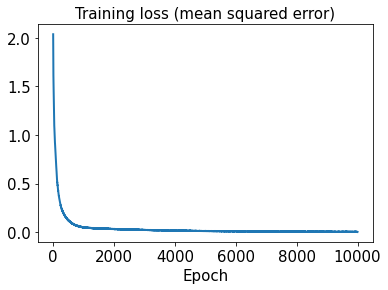

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

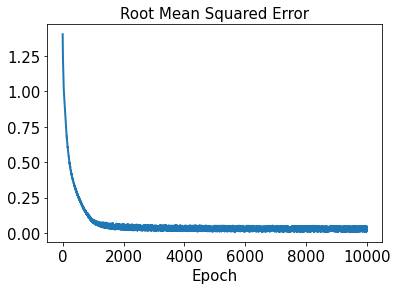

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
decoded_sensor_train1 = sensor_pred1.predict(t_train)

In [25]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [26]:
error_train_abs1 = np.abs(decoded_sensor_train1 - x_train1)

In [27]:
error_test_abs1 = np.abs(decoded_sensor_test1 - x_test1)

In [28]:
error_train_abs1

array([[[3.57484465e-01],
        [6.38891576e-01],
        [1.21129995e+00],
        [1.14585900e+00],
        [6.06365814e-02],
        [1.26660472e+00],
        [6.64375307e-01],
        [5.19027426e-02],
        [7.45691238e-01],
        [3.27379076e-01],
        [2.66002064e-01],
        [2.04163490e-01],
        [1.86220111e-01],
        [1.42093986e+00],
        [3.12189518e-01],
        [3.77691107e-01]],

       [[3.30095671e-01],
        [1.07448977e+00],
        [2.77121566e-01],
        [9.98370000e-01],
        [3.79442272e-01],
        [5.99672951e-01],
        [3.13505289e-01],
        [1.31104452e+00],
        [9.19147215e-02],
        [1.15460831e-01],
        [3.62014316e-01],
        [3.08742198e-02],
        [2.66842910e-01],
        [2.16795764e-01],
        [7.45976386e-01],
        [9.12795804e-01]],

       [[2.77506306e-01],
        [5.50298479e-01],
        [1.05635702e+00],
        [9.60035379e-01],
        [1.84229341e-02],
        [1.10705905e+00],
        

In [29]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

1.3902723355318012


In [30]:
l2_error_sensor_test1 = np.sqrt(np.sum((decoded_sensor_test1 - x_test1)**2) / np.sum(x_test1**2))
print(l2_error_sensor_test1)

1.4706178318553684


In [31]:
sensor_pred2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [32]:
start2 = datetime.datetime.now()
history2 = sensor_pred2.fit(t_train, x_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 10ms/step - loss: 2.5888 - rmse: 1.6081
Epoch 2/10000
2/2 [==============================] - 0s 33ms/step - loss: 2.5654 - rmse: 1.6008
Epoch 3/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5480 - rmse: 1.5953
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5336 - rmse: 1.5908
Epoch 5/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.5200 - rmse: 1.5865
Epoch 6/10000
2/2 [==============================] - 0s 21ms/step - loss: 2.5102 - rmse: 1.5834
Epoch 7/10000
2/2 [==============================] - 0s 19ms/step - loss: 2.4998 - rmse: 1.5801
Epoch 8/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4921 - rmse: 1.5777
Epoch 9/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4860 - rmse: 1.5758
Epoch 10/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4792 - rmse: 1.5736
Epoch 11/10000
2/2 [====================

2/2 [==============================] - 0s 7ms/step - loss: 2.1637 - rmse: 1.4700
Epoch 87/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1623 - rmse: 1.4695
Epoch 88/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1605 - rmse: 1.4689
Epoch 89/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1502 - rmse: 1.4653
Epoch 90/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1494 - rmse: 1.4651
Epoch 91/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1434 - rmse: 1.4630
Epoch 92/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1418 - rmse: 1.4625
Epoch 93/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1400 - rmse: 1.4619
Epoch 94/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1350 - rmse: 1.4602
Epoch 95/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1298 - rmse: 1.4584
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 8ms/step - loss: 1.8752 - rmse: 1.3683
Epoch 171/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8735 - rmse: 1.3677
Epoch 172/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8629 - rmse: 1.3638
Epoch 173/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8599 - rmse: 1.3627
Epoch 174/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8565 - rmse: 1.3615
Epoch 175/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8531 - rmse: 1.3602
Epoch 176/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8493 - rmse: 1.3588
Epoch 177/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8463 - rmse: 1.3577
Epoch 178/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.8431 - rmse: 1.3565
Epoch 179/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.8453 - rmse: 1.3574
Epoch 180/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 1.5871 - rmse: 1.2587
Epoch 255/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5819 - rmse: 1.2566
Epoch 256/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5800 - rmse: 1.2558
Epoch 257/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.5799 - rmse: 1.2558
Epoch 258/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5759 - rmse: 1.2542
Epoch 259/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5688 - rmse: 1.2514
Epoch 260/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5659 - rmse: 1.2502
Epoch 261/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5623 - rmse: 1.2488
Epoch 262/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5607 - rmse: 1.2481
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5583 - rmse: 1.2471
Epoch 264/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 1.3224 - rmse: 1.1487
Epoch 339/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3197 - rmse: 1.1475
Epoch 340/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3194 - rmse: 1.1474
Epoch 341/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3127 - rmse: 1.1445
Epoch 342/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3071 - rmse: 1.1420
Epoch 343/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3036 - rmse: 1.1405
Epoch 344/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3065 - rmse: 1.1418
Epoch 345/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3015 - rmse: 1.1396
Epoch 346/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2944 - rmse: 1.1365
Epoch 347/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2911 - rmse: 1.1350
Epoch 348/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 1.0725 - rmse: 1.0342
Epoch 423/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0694 - rmse: 1.0327
Epoch 424/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0680 - rmse: 1.0320
Epoch 425/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0649 - rmse: 1.0306
Epoch 426/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0608 - rmse: 1.0286
Epoch 427/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0593 - rmse: 1.0278
Epoch 428/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0563 - rmse: 1.0264
Epoch 429/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0477 - rmse: 1.0222
Epoch 430/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0438 - rmse: 1.0203
Epoch 431/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0460 - rmse: 1.0213
Epoch 432/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 0.8382 - rmse: 0.9140
Epoch 507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8399 - rmse: 0.9149
Epoch 508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8353 - rmse: 0.9124
Epoch 509/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8372 - rmse: 0.9134
Epoch 510/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8320 - rmse: 0.9106
Epoch 511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8249 - rmse: 0.9067
Epoch 512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8227 - rmse: 0.9055
Epoch 513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8241 - rmse: 0.9062
Epoch 514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8172 - rmse: 0.9024
Epoch 515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8142 - rmse: 0.9007
Epoch 516/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.6382 - rmse: 0.7971
Epoch 591/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.6352 - rmse: 0.7952
Epoch 592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6383 - rmse: 0.7972
Epoch 593/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6370 - rmse: 0.7964
Epoch 594/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6355 - rmse: 0.7954
Epoch 595/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.6263 - rmse: 0.7896
Epoch 596/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6265 - rmse: 0.7897
Epoch 597/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6224 - rmse: 0.7871
Epoch 598/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.6198 - rmse: 0.7855
Epoch 599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6198 - rmse: 0.7855
Epoch 600/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.4716 - rmse: 0.6847
Epoch 675/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4704 - rmse: 0.6838
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4691 - rmse: 0.6829
Epoch 677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4715 - rmse: 0.6846
Epoch 678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4660 - rmse: 0.6806
Epoch 679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4640 - rmse: 0.6791
Epoch 680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4672 - rmse: 0.6814
Epoch 681/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4604 - rmse: 0.6765
Epoch 682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4595 - rmse: 0.6758
Epoch 683/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4604 - rmse: 0.6765
Epoch 684/10000
2/2 [==================

2/2 [==============================] - 0s 13ms/step - loss: 0.3420 - rmse: 0.5825
Epoch 759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3418 - rmse: 0.5822
Epoch 760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3408 - rmse: 0.5814
Epoch 761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3424 - rmse: 0.5828
Epoch 762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3366 - rmse: 0.5778
Epoch 763/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3352 - rmse: 0.5765
Epoch 764/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3368 - rmse: 0.5780
Epoch 765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3325 - rmse: 0.5742
Epoch 766/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3386 - rmse: 0.5795
Epoch 767/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3347 - rmse: 0.5761
Epoch 768/10000
2/2 [==================

2/2 [==============================] - 0s 11ms/step - loss: 0.2411 - rmse: 0.4883
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2471 - rmse: 0.4943
Epoch 844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2394 - rmse: 0.4864
Epoch 845/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2408 - rmse: 0.4879
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2368 - rmse: 0.4837
Epoch 847/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2351 - rmse: 0.4821
Epoch 848/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2394 - rmse: 0.4864
Epoch 849/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2322 - rmse: 0.4790
Epoch 850/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2350 - rmse: 0.4820
Epoch 851/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2304 - rmse: 0.4772
Epoch 852/10000
2/2 [==================

2/2 [==============================] - 0s 13ms/step - loss: 0.1663 - rmse: 0.4044
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1623 - rmse: 0.3994
Epoch 928/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1625 - rmse: 0.3997
Epoch 929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1620 - rmse: 0.3991
Epoch 930/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1628 - rmse: 0.4001
Epoch 931/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1596 - rmse: 0.3961
Epoch 932/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1596 - rmse: 0.3960
Epoch 933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1584 - rmse: 0.3946
Epoch 934/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1622 - rmse: 0.3993
Epoch 935/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1559 - rmse: 0.3914
Epoch 936/10000
2/2 [==================

Epoch 1010/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1115 - rmse: 0.3298
Epoch 1011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1102 - rmse: 0.3279
Epoch 1012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1055 - rmse: 0.3205
Epoch 1013/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1037 - rmse: 0.3178
Epoch 1014/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1038 - rmse: 0.3179
Epoch 1015/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1027 - rmse: 0.3162
Epoch 1016/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1050 - rmse: 0.3198
Epoch 1017/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1054 - rmse: 0.3204
Epoch 1018/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1011 - rmse: 0.3137
Epoch 1019/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1069 - rmse: 0.3228
Epoch 1020/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0714 - rmse: 0.2621
Epoch 1094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0739 - rmse: 0.2668
Epoch 1095/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0741 - rmse: 0.2671
Epoch 1096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0732 - rmse: 0.2655
Epoch 1097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0677 - rmse: 0.2549
Epoch 1098/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0705 - rmse: 0.2603
Epoch 1099/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0663 - rmse: 0.2523
Epoch 1100/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0699 - rmse: 0.2592
Epoch 1101/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0654 - rmse: 0.2504
Epoch 1102/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0671 - rmse: 0.2537
Epoch 1103/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0455 - rmse: 0.2069
Epoch 1177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0451 - rmse: 0.2058
Epoch 1178/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0454 - rmse: 0.2066
Epoch 1179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0428 - rmse: 0.2003
Epoch 1180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0428 - rmse: 0.2003
Epoch 1181/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0438 - rmse: 0.2029
Epoch 1182/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0441 - rmse: 0.2034
Epoch 1183/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0437 - rmse: 0.2026
Epoch 1184/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0404 - rmse: 0.1942
Epoch 1185/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0434 - rmse: 0.2018
Epoch 1186/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0269 - rmse: 0.1556
Epoch 1260/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0291 - rmse: 0.1625
Epoch 1261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0274 - rmse: 0.1572
Epoch 1262/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0275 - rmse: 0.1576
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0271 - rmse: 0.1564
Epoch 1264/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0272 - rmse: 0.1568
Epoch 1265/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0310 - rmse: 0.1685
Epoch 1266/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0324 - rmse: 0.1724
Epoch 1267/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0260 - rmse: 0.1528
Epoch 1268/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0270 - rmse: 0.1560
Epoch 1269/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0164 - rmse: 0.1173
Epoch 1343/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0172 - rmse: 0.1207
Epoch 1344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0232 - rmse: 0.1432
Epoch 1345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0220 - rmse: 0.1391
Epoch 1346/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0230 - rmse: 0.1428
Epoch 1347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0170 - rmse: 0.1199
Epoch 1348/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0190 - rmse: 0.1277
Epoch 1349/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0156 - rmse: 0.1139
Epoch 1350/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0192 - rmse: 0.1286
Epoch 1351/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0154 - rmse: 0.1131
Epoch 1352/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0162 - rmse: 0.1165
Epoch 1426/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0111 - rmse: 0.0923
Epoch 1427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0109 - rmse: 0.0907
Epoch 1428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0115 - rmse: 0.0940
Epoch 1429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0120 - rmse: 0.0969
Epoch 1430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0857
Epoch 1431/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0122 - rmse: 0.0980
Epoch 1432/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0115 - rmse: 0.0943
Epoch 1433/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0855
Epoch 1434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0846
Epoch 1435/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0129 - rmse: 0.1013
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0757
Epoch 1510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0651
Epoch 1511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0667
Epoch 1512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0125 - rmse: 0.0996
Epoch 1513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0887
Epoch 1514/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0852
Epoch 1515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0655
Epoch 1516/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0120 - rmse: 0.0967
Epoch 1517/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0634
Epoch 1518/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0489
Epoch 1592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0484
Epoch 1593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0666
Epoch 1594/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0479
Epoch 1595/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0084 - rmse: 0.0765
Epoch 1596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0121 - rmse: 0.0974
Epoch 1597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0101 - rmse: 0.0866
Epoch 1598/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0105 - rmse: 0.0890
Epoch 1599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0109 - rmse: 0.0914
Epoch 1600/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0121 - rmse: 0.0977
Epoch 1601/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0535
Epoch 1675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0696
Epoch 1676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0405
Epoch 1677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0368
Epoch 1678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0539
Epoch 1679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.0887
Epoch 1680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0673
Epoch 1681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0569
Epoch 1682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0645
Epoch 1683/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0892
Epoch 1684/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0376
Epoch 1758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0354
Epoch 1759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0485
Epoch 1760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0687
Epoch 1761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0369
Epoch 1762/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0349
Epoch 1763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0652
Epoch 1764/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0751
Epoch 1765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0632
Epoch 1766/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0696
Epoch 1767/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0296
Epoch 1841/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0106 - rmse: 0.0896
Epoch 1842/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0557
Epoch 1843/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0089 - rmse: 0.0797
Epoch 1844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0556
Epoch 1845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0456
Epoch 1846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0334
Epoch 1847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0257
Epoch 1848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0404
Epoch 1849/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0651
Epoch 1850/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0377
Epoch 1924/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0440
Epoch 1925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0608
Epoch 1926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0232
Epoch 1927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0186
Epoch 1928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0177
Epoch 1929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0751
Epoch 1930/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0256
Epoch 1931/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0205
Epoch 1932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0593
Epoch 1933/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0322
Epoch 2007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0382
Epoch 2008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0430
Epoch 2009/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - rmse: 0.0846
Epoch 2010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0442
Epoch 2011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0472
Epoch 2012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0288
Epoch 2013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0629
Epoch 2014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0395
Epoch 2015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0563
Epoch 2016/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0460
Epoch 2090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0494
Epoch 2091/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0736
Epoch 2092/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0265
Epoch 2093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0838
Epoch 2094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0687
Epoch 2095/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0104 - rmse: 0.0889
Epoch 2096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0778
Epoch 2097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0747
Epoch 2098/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0182
Epoch 2099/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0651
Epoch 2173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0103 - rmse: 0.0884
Epoch 2174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0715
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0274
Epoch 2176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0613
Epoch 2177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0275
Epoch 2178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0259
Epoch 2179/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0673
Epoch 2180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0896
Epoch 2181/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0492
Epoch 2182/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0668
Epoch 2256/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0057 - rmse: 0.0570
Epoch 2257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0800
Epoch 2258/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0085 - rmse: 0.0781
Epoch 2259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0201
Epoch 2260/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0614
Epoch 2261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0214
Epoch 2262/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0190
Epoch 2263/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0405
Epoch 2264/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0598
Epoch 2265/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0207
Epoch 2339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0131
Epoch 2340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0367
Epoch 2341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0380
Epoch 2342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0439
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0569
Epoch 2344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0656
Epoch 2345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0473
Epoch 2346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0429
Epoch 2347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0382
Epoch 2348/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0064 - rmse: 0.0630
Epoch 2422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0094 - rmse: 0.0837
Epoch 2423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0580
Epoch 2424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0250
Epoch 2425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0443
Epoch 2426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.0882
Epoch 2427/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0583
Epoch 2428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0828
Epoch 2429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0164
Epoch 2430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0402
Epoch 2431/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0835
Epoch 2505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0101 - rmse: 0.0876
Epoch 2506/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0655
Epoch 2507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0519
Epoch 2508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0697
Epoch 2509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0519
Epoch 2510/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0490
Epoch 2511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0616
Epoch 2512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0100 - rmse: 0.0875
Epoch 2513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0453
Epoch 2514/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0525
Epoch 2588/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0288
Epoch 2589/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0523
Epoch 2590/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0474
Epoch 2591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0424
Epoch 2592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0432
Epoch 2593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0638
Epoch 2594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0589
Epoch 2595/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0638
Epoch 2596/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0297
Epoch 2597/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0275
Epoch 2671/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0574
Epoch 2672/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0513
Epoch 2673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0780
Epoch 2674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0210
Epoch 2675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0833
Epoch 2676/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0550
Epoch 2677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0818
Epoch 2678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0167
Epoch 2679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0750
Epoch 2680/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0406
Epoch 2754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0162
Epoch 2755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0609
Epoch 2756/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0152
Epoch 2757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0253
Epoch 2758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0194
Epoch 2759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0658
Epoch 2760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0181
Epoch 2761/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0476
Epoch 2762/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0385
Epoch 2763/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0354
Epoch 2837/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0084 - rmse: 0.0778
Epoch 2838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0408
Epoch 2839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0774
Epoch 2840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0193
Epoch 2841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0832
Epoch 2842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0618
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0149
Epoch 2844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0302
Epoch 2845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0440
Epoch 2846/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0554
Epoch 2920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0843
Epoch 2921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0657
Epoch 2922/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0355
Epoch 2923/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0835
Epoch 2924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0493
Epoch 2925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0378
Epoch 2926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0804
Epoch 2927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0486
Epoch 2928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0691
Epoch 2929/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0481
Epoch 3003/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0566
Epoch 3004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0389
Epoch 3005/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0847
Epoch 3006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0255
Epoch 3007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0290
Epoch 3008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0765
Epoch 3009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0355
Epoch 3010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0505
Epoch 3011/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0105 - rmse: 0.0906
Epoch 3012/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0489
Epoch 3086/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0606
Epoch 3087/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0639
Epoch 3088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0642
Epoch 3089/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0291
Epoch 3090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0878
Epoch 3091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0226
Epoch 3092/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0086 - rmse: 0.0799
Epoch 3093/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0439
Epoch 3094/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0614
Epoch 3095/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0741
Epoch 3169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0832
Epoch 3170/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0478
Epoch 3171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0375
Epoch 3172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0627
Epoch 3173/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0369
Epoch 3174/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0629
Epoch 3175/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0615
Epoch 3176/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0498
Epoch 3177/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0101 - rmse: 0.0888
Epoch 3178/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0377
Epoch 3252/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0694
Epoch 3253/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0665
Epoch 3254/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0521
Epoch 3255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0568
Epoch 3256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0161
Epoch 3257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0133
Epoch 3258/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0104
Epoch 3259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0782
Epoch 3260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0134
Epoch 3261/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0644
Epoch 3335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0573
Epoch 3336/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0361
Epoch 3337/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0569
Epoch 3338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0270
Epoch 3339/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0090 - rmse: 0.0823
Epoch 3340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0527
Epoch 3341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0245
Epoch 3342/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0058 - rmse: 0.0602
Epoch 3343/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0787
Epoch 3344/10000
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0311
Epoch 3418/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0207
Epoch 3419/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0192
Epoch 3420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0744
Epoch 3421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0384
Epoch 3422/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0180
Epoch 3423/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0339
Epoch 3424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0486
Epoch 3425/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0158
Epoch 3426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0657
Epoch 3427/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0102 - rmse: 0.0895
Epoch 3501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0289
Epoch 3502/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0302
Epoch 3503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0755
Epoch 3504/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0658
Epoch 3505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0212
Epoch 3506/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0823
Epoch 3507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0296
Epoch 3508/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0066 - rmse: 0.0669
Epoch 3509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0863
Epoch 3510/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0754
Epoch 3584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0599
Epoch 3585/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0278
Epoch 3586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0696
Epoch 3587/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0400
Epoch 3588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0915
Epoch 3589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0503
Epoch 3590/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0683
Epoch 3591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0722
Epoch 3592/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0541
Epoch 3593/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0444
Epoch 3667/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0360
Epoch 3668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0389
Epoch 3669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0631
Epoch 3670/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0646
Epoch 3671/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0661
Epoch 3672/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0617
Epoch 3673/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0570
Epoch 3674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0839
Epoch 3675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0166
Epoch 3676/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0355
Epoch 3750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0876
Epoch 3751/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0836
Epoch 3752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0394
Epoch 3753/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0298
Epoch 3754/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0487
Epoch 3755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0182
Epoch 3756/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0313
Epoch 3757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0789
Epoch 3758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0098 - rmse: 0.0878
Epoch 3759/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0087
Epoch 3833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0086
Epoch 3834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0748
Epoch 3835/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - rmse: 0.0874
Epoch 3836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0414
Epoch 3837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0533
Epoch 3838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0518
Epoch 3839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0218
Epoch 3840/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0266
Epoch 3841/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0772
Epoch 3842/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0228
Epoch 3916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0590
Epoch 3917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0418
Epoch 3918/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0375
Epoch 3919/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - rmse: 0.0889
Epoch 3920/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0407
Epoch 3921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0786
Epoch 3922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0795
Epoch 3923/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0540
Epoch 3924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0676
Epoch 3925/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0740
Epoch 3999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0834
Epoch 4000/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0203
Epoch 4001/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0690
Epoch 4002/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0271
Epoch 4003/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0368
Epoch 4004/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0174
Epoch 4005/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0126
Epoch 4006/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0153
Epoch 4007/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0285
Epoch 4008/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0434
Epoch 4082/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0440
Epoch 4083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0872
Epoch 4084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0707
Epoch 4085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0436
Epoch 4086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0397
Epoch 4087/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0181
Epoch 4088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0876
Epoch 4089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0198
Epoch 4090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0199
Epoch 4091/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0143
Epoch 4165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0109
Epoch 4166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0409
Epoch 4167/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0057 - rmse: 0.0604
Epoch 4168/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0888
Epoch 4169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0753
Epoch 4170/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0751
Epoch 4171/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0088 - rmse: 0.0822
Epoch 4172/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0217
Epoch 4173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0554
Epoch 4174/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0795
Epoch 4248/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0468
Epoch 4249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0813
Epoch 4250/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0408
Epoch 4251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0754
Epoch 4252/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0414
Epoch 4253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0442
Epoch 4254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0463
Epoch 4255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0481
Epoch 4256/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0354
Epoch 4257/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0466
Epoch 4331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0584
Epoch 4332/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0490
Epoch 4333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0334
Epoch 4334/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0610
Epoch 4335/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0499
Epoch 4336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0753
Epoch 4337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0454
Epoch 4338/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0235
Epoch 4339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0254
Epoch 4340/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0247
Epoch 4414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0578
Epoch 4415/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0399
Epoch 4416/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0350
Epoch 4417/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0157
Epoch 4418/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0057 - rmse: 0.0609
Epoch 4419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0398
Epoch 4420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0740
Epoch 4421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0213
Epoch 4422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0556
Epoch 4423/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0424
Epoch 4497/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0099 - rmse: 0.0891
Epoch 4498/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0671
Epoch 4499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0791
Epoch 4500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0832
Epoch 4501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0496
Epoch 4502/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0322
Epoch 4503/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0513
Epoch 4504/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0448
Epoch 4505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0609
Epoch 4506/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0088 - rmse: 0.0832
Epoch 4580/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0425
Epoch 4581/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0257
Epoch 4582/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0774
Epoch 4583/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0795
Epoch 4584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0298
Epoch 4585/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0429
Epoch 4586/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0366
Epoch 4587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0128
Epoch 4588/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0411
Epoch 4589/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0355
Epoch 4663/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0475
Epoch 4664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0432
Epoch 4665/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0782
Epoch 4666/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0568
Epoch 4667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0750
Epoch 4668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0378
Epoch 4669/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0817
Epoch 4670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0121
Epoch 4671/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0230
Epoch 4672/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0134
Epoch 4746/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0702
Epoch 4747/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0395
Epoch 4748/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0198
Epoch 4749/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0586
Epoch 4750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0626
Epoch 4751/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0290
Epoch 4752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0614
Epoch 4753/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0662
Epoch 4754/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0561
Epoch 4755/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0457
Epoch 4829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0484
Epoch 4830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0618
Epoch 4831/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0097 - rmse: 0.0885
Epoch 4832/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0438
Epoch 4833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0327
Epoch 4834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0215
Epoch 4835/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0661
Epoch 4836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0366
Epoch 4837/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0172
Epoch 4838/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0190
Epoch 4912/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0670
Epoch 4913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0238
Epoch 4914/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0384
Epoch 4915/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0613
Epoch 4916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0608
Epoch 4917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0196
Epoch 4918/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0158
Epoch 4919/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0659
Epoch 4920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0790
Epoch 4921/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0746
Epoch 4995/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0305
Epoch 4996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0502
Epoch 4997/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0508
Epoch 4998/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0446
Epoch 4999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0854
Epoch 5000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0365
Epoch 5001/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0707
Epoch 5002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0375
Epoch 5003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0739
Epoch 5004/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0351
Epoch 5078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0849
Epoch 5079/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0777
Epoch 5080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0856
Epoch 5081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0718
Epoch 5082/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0295
Epoch 5083/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0444
Epoch 5084/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0759
Epoch 5085/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0310
Epoch 5086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0604
Epoch 5087/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0416
Epoch 5161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0196
Epoch 5162/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0361
Epoch 5163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0690
Epoch 5164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0211
Epoch 5165/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0430
Epoch 5166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0133
Epoch 5167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0698
Epoch 5168/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0419
Epoch 5169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0829
Epoch 5170/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0231
Epoch 5244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0889
Epoch 5245/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0883
Epoch 5246/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0796
Epoch 5247/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0291
Epoch 5248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0671
Epoch 5249/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0751
Epoch 5250/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0391
Epoch 5251/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0751
Epoch 5252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0675
Epoch 5253/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0483
Epoch 5327/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0387
Epoch 5328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0377
Epoch 5329/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0798
Epoch 5330/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0817
Epoch 5331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0789
Epoch 5332/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0240
Epoch 5333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0657
Epoch 5334/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0599
Epoch 5335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0169
Epoch 5336/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0301
Epoch 5410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0178
Epoch 5411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0154
Epoch 5412/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0171
Epoch 5413/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0748
Epoch 5414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0146
Epoch 5415/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0161
Epoch 5416/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0489
Epoch 5417/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0780
Epoch 5418/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0192
Epoch 5419/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0688
Epoch 5493/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0785
Epoch 5494/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0820
Epoch 5495/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0240
Epoch 5496/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0228
Epoch 5497/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0061 - rmse: 0.0664
Epoch 5498/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0691
Epoch 5499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0747
Epoch 5500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0364
Epoch 5501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0573
Epoch 5502/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0658
Epoch 5576/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0448
Epoch 5577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0845
Epoch 5578/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0331
Epoch 5579/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0296
Epoch 5580/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0516
Epoch 5581/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0708
Epoch 5582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0348
Epoch 5583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0701
Epoch 5584/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0086 - rmse: 0.0831
Epoch 5585/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0608
Epoch 5659/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0084 - rmse: 0.0822
Epoch 5660/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0647
Epoch 5661/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0248
Epoch 5662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0875
Epoch 5663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0388
Epoch 5664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0887
Epoch 5665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0731
Epoch 5666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0571
Epoch 5667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0218
Epoch 5668/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0598
Epoch 5742/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0773
Epoch 5743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0656
Epoch 5744/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0566
Epoch 5745/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0686
Epoch 5746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0554
Epoch 5747/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0131
Epoch 5748/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0155
Epoch 5749/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0333
Epoch 5750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0090
Epoch 5751/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0346
Epoch 5825/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0217
Epoch 5826/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0570
Epoch 5827/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0080 - rmse: 0.0799
Epoch 5828/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0746
Epoch 5829/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0211
Epoch 5830/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0884
Epoch 5831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0239
Epoch 5832/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0338
Epoch 5833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0089 - rmse: 0.0848
Epoch 5834/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0084 - rmse: 0.0821
Epoch 5908/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0514
Epoch 5909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0451
Epoch 5910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0436
Epoch 5911/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0784
Epoch 5912/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0775
Epoch 5913/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0433
Epoch 5914/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0164
Epoch 5915/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0778
Epoch 5916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0437
Epoch 5917/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0347
Epoch 5991/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0754
Epoch 5992/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0228
Epoch 5993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0152
Epoch 5994/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0636
Epoch 5995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0185
Epoch 5996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0266
Epoch 5997/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0059 - rmse: 0.0654
Epoch 5998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0278
Epoch 5999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0744
Epoch 6000/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0448
Epoch 6074/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0234
Epoch 6075/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0285
Epoch 6076/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0712
Epoch 6077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0443
Epoch 6078/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0381
Epoch 6079/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0793
Epoch 6080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0672
Epoch 6081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0215
Epoch 6082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0395
Epoch 6083/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0438
Epoch 6157/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0194
Epoch 6158/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0092 - rmse: 0.0874
Epoch 6159/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0503
Epoch 6160/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0543
Epoch 6161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0839
Epoch 6162/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0693
Epoch 6163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0835
Epoch 6164/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0569
Epoch 6165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0662
Epoch 6166/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0259
Epoch 6240/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0214
Epoch 6241/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0097 - rmse: 0.0899
Epoch 6242/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0075 - rmse: 0.0773
Epoch 6243/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0179
Epoch 6244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0460
Epoch 6245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0158
Epoch 6246/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0084 - rmse: 0.0829
Epoch 6247/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0747
Epoch 6248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0155
Epoch 6249/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0241
Epoch 6323/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0140
Epoch 6324/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0748
Epoch 6325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0256
Epoch 6326/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0240
Epoch 6327/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0327
Epoch 6328/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0358
Epoch 6329/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0573
Epoch 6330/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0443
Epoch 6331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0735
Epoch 6332/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0055 - rmse: 0.0626
Epoch 6406/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0499
Epoch 6407/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0420
Epoch 6408/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0190
Epoch 6409/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0167
Epoch 6410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0513
Epoch 6411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0175
Epoch 6412/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0799
Epoch 6413/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0345
Epoch 6414/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0791
Epoch 6415/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0428
Epoch 6489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0558
Epoch 6490/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0600
Epoch 6491/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0817
Epoch 6492/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0559
Epoch 6493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0724
Epoch 6494/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0292
Epoch 6495/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0816
Epoch 6496/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0121
Epoch 6497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0306
Epoch 6498/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0389
Epoch 6572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0201
Epoch 6573/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0416
Epoch 6574/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0158
Epoch 6575/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0208
Epoch 6576/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0662
Epoch 6577/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0782
Epoch 6578/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0670
Epoch 6579/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0659
Epoch 6580/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0078 - rmse: 0.0796
Epoch 6581/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0453
Epoch 6655/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0389
Epoch 6656/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0864
Epoch 6657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0088 - rmse: 0.0855
Epoch 6658/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0532
Epoch 6659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0527
Epoch 6660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0321
Epoch 6661/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0249
Epoch 6662/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0830
Epoch 6663/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0225
Epoch 6664/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0317
Epoch 6738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0493
Epoch 6739/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0843
Epoch 6740/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0605
Epoch 6741/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0595
Epoch 6742/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0755
Epoch 6743/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0419
Epoch 6744/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0663
Epoch 6745/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0830
Epoch 6746/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0058 - rmse: 0.0655
Epoch 6747/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0625
Epoch 6821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0413
Epoch 6822/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0589
Epoch 6823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0409
Epoch 6824/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0186
Epoch 6825/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0076 - rmse: 0.0786
Epoch 6826/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0658
Epoch 6827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0494
Epoch 6828/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0562
Epoch 6829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0239
Epoch 6830/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0605
Epoch 6904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0379
Epoch 6905/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0496
Epoch 6906/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0491
Epoch 6907/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0709
Epoch 6908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0514
Epoch 6909/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0645
Epoch 6910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0852
Epoch 6911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0597
Epoch 6912/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0267
Epoch 6913/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0238
Epoch 6987/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0752
Epoch 6988/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0228
Epoch 6989/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0192
Epoch 6990/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0152
Epoch 6991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0265
Epoch 6992/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0669
Epoch 6993/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0288
Epoch 6994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0203
Epoch 6995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0406
Epoch 6996/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0639
Epoch 7070/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0336
Epoch 7071/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0374
Epoch 7072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0570
Epoch 7073/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0773
Epoch 7074/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0640
Epoch 7075/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0439
Epoch 7076/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0747
Epoch 7077/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0790
Epoch 7078/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0820
Epoch 7079/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0795
Epoch 7153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0825
Epoch 7154/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0623
Epoch 7155/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0820
Epoch 7156/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0153
Epoch 7157/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0743
Epoch 7158/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0563
Epoch 7159/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0785
Epoch 7160/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0437
Epoch 7161/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0519
Epoch 7162/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0156
Epoch 7236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0201
Epoch 7237/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0707
Epoch 7238/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0219
Epoch 7239/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0440
Epoch 7240/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0780
Epoch 7241/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0391
Epoch 7242/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0185
Epoch 7243/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0522
Epoch 7244/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0114
Epoch 7245/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0440
Epoch 7319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0296
Epoch 7320/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0148
Epoch 7321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0370
Epoch 7322/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0435
Epoch 7323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0503
Epoch 7324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0443
Epoch 7325/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0665
Epoch 7326/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0216
Epoch 7327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0357
Epoch 7328/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0358
Epoch 7402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0181
Epoch 7403/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0729
Epoch 7404/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0566
Epoch 7405/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0210
Epoch 7406/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0576
Epoch 7407/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0601
Epoch 7408/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0471
Epoch 7409/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0385
Epoch 7410/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0144
Epoch 7411/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0629
Epoch 7485/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0755
Epoch 7486/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0745
Epoch 7487/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0575
Epoch 7488/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0236
Epoch 7489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0119
Epoch 7490/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0656
Epoch 7491/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0608
Epoch 7492/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0781
Epoch 7493/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0645
Epoch 7494/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0201
Epoch 7568/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0180
Epoch 7569/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0236
Epoch 7570/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0239
Epoch 7571/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0201
Epoch 7572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0759
Epoch 7573/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0083 - rmse: 0.0832
Epoch 7574/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0206
Epoch 7575/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0237
Epoch 7576/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0746
Epoch 7577/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0882
Epoch 7651/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0502
Epoch 7652/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0657
Epoch 7653/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0167
Epoch 7654/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0322
Epoch 7655/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0748
Epoch 7656/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0301
Epoch 7657/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0404
Epoch 7658/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0559
Epoch 7659/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0509
Epoch 7660/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0117
Epoch 7734/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0568
Epoch 7735/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0569
Epoch 7736/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0124
Epoch 7737/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0819
Epoch 7738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0198
Epoch 7739/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0785
Epoch 7740/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0558
Epoch 7741/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0615
Epoch 7742/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0476
Epoch 7743/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0146
Epoch 7817/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0393
Epoch 7818/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0838
Epoch 7819/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0833
Epoch 7820/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0733
Epoch 7821/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0315
Epoch 7822/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0407
Epoch 7823/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0829
Epoch 7824/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0271
Epoch 7825/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0484
Epoch 7826/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0263
Epoch 7900/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0348
Epoch 7901/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0524
Epoch 7902/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0522
Epoch 7903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0470
Epoch 7904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0432
Epoch 7905/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0441
Epoch 7906/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0689
Epoch 7907/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0600
Epoch 7908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0909
Epoch 7909/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0348
Epoch 7983/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0202
Epoch 7984/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0615
Epoch 7985/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0096
Epoch 7986/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0244
Epoch 7987/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0600
Epoch 7988/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0598
Epoch 7989/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0786
Epoch 7990/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0467
Epoch 7991/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0595
Epoch 7992/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0334
Epoch 8066/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0399
Epoch 8067/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0261
Epoch 8068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0286
Epoch 8069/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0858
Epoch 8070/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0718
Epoch 8071/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0555
Epoch 8072/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0374
Epoch 8073/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0514
Epoch 8074/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0755
Epoch 8075/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0297
Epoch 8149/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0758
Epoch 8150/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0393
Epoch 8151/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0754
Epoch 8152/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0681
Epoch 8153/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0760
Epoch 8154/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0460
Epoch 8155/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0674
Epoch 8156/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0324
Epoch 8157/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0092 - rmse: 0.0892
Epoch 8158/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0557
Epoch 8232/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0329
Epoch 8233/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0558
Epoch 8234/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0778
Epoch 8235/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0704
Epoch 8236/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0386
Epoch 8237/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0724
Epoch 8238/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0862
Epoch 8239/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0268
Epoch 8240/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0814
Epoch 8241/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0612
Epoch 8315/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0188
Epoch 8316/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0403
Epoch 8317/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0700
Epoch 8318/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0311
Epoch 8319/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0413
Epoch 8320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0841
Epoch 8321/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0278
Epoch 8322/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0883
Epoch 8323/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0660
Epoch 8324/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0522
Epoch 8398/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0847
Epoch 8399/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0299
Epoch 8400/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0681
Epoch 8401/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0637
Epoch 8402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0401
Epoch 8403/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0243
Epoch 8404/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0306
Epoch 8405/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0230
Epoch 8406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0398
Epoch 8407/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0571
Epoch 8481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0342
Epoch 8482/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0074 - rmse: 0.0790
Epoch 8483/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0336
Epoch 8484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0169
Epoch 8485/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0199
Epoch 8486/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0837
Epoch 8487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0694
Epoch 8488/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0739
Epoch 8489/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0514
Epoch 8490/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0168
Epoch 8564/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0597
Epoch 8565/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0784
Epoch 8566/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0727
Epoch 8567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0433
Epoch 8568/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0552
Epoch 8569/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0552
Epoch 8570/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0065 - rmse: 0.0726
Epoch 8571/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0551
Epoch 8572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0461
Epoch 8573/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0657
Epoch 8647/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0468
Epoch 8648/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0217
Epoch 8649/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0688
Epoch 8650/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0838
Epoch 8651/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0500
Epoch 8652/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0765
Epoch 8653/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0763
Epoch 8654/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0232
Epoch 8655/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0851
Epoch 8656/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0789
Epoch 8730/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0465
Epoch 8731/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0753
Epoch 8732/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0143
Epoch 8733/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0631
Epoch 8734/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0360
Epoch 8735/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0170
Epoch 8736/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0227
Epoch 8737/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0151
Epoch 8738/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0216
Epoch 8739/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0292
Epoch 8813/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0617
Epoch 8814/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0447
Epoch 8815/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0653
Epoch 8816/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0433
Epoch 8817/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0610
Epoch 8818/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0192
Epoch 8819/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0670
Epoch 8820/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0873
Epoch 8821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0574
Epoch 8822/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0191
Epoch 8896/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0801
Epoch 8897/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0639
Epoch 8898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0418
Epoch 8899/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0075 - rmse: 0.0798
Epoch 8900/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0753
Epoch 8901/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0792
Epoch 8902/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0705
Epoch 8903/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0261
Epoch 8904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0177
Epoch 8905/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0646
Epoch 8979/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0696
Epoch 8980/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0423
Epoch 8981/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0296
Epoch 8982/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0680
Epoch 8983/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0298
Epoch 8984/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0284
Epoch 8985/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0725
Epoch 8986/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0240
Epoch 8987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0757
Epoch 8988/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0163
Epoch 9062/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0578
Epoch 9063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0399
Epoch 9064/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0192
Epoch 9065/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0147
Epoch 9066/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0843
Epoch 9067/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0374
Epoch 9068/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0838
Epoch 9069/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0576
Epoch 9070/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0396
Epoch 9071/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0219
Epoch 9145/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0397
Epoch 9146/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0765
Epoch 9147/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0424
Epoch 9148/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0755
Epoch 9149/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0305
Epoch 9150/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0799
Epoch 9151/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0286
Epoch 9152/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0835
Epoch 9153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0673
Epoch 9154/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0502
Epoch 9228/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0790
Epoch 9229/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0452
Epoch 9230/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0498
Epoch 9231/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0075 - rmse: 0.0800
Epoch 9232/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0801
Epoch 9233/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0702
Epoch 9234/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0590
Epoch 9235/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0240
Epoch 9236/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0382
Epoch 9237/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0503
Epoch 9311/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0418
Epoch 9312/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0319
Epoch 9313/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0269
Epoch 9314/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0598
Epoch 9315/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0537
Epoch 9316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0301
Epoch 9317/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0417
Epoch 9318/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0514
Epoch 9319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0800
Epoch 9320/10000
2/2 [==========

2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0558
Epoch 9394/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0366
Epoch 9395/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0647
Epoch 9396/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0144
Epoch 9397/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0091
Epoch 9398/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0393
Epoch 9399/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0612
Epoch 9400/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0422
Epoch 9401/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0481
Epoch 9402/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0772
Epoch 9403/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0140
Epoch 9477/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0078 - rmse: 0.0817
Epoch 9478/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0433
Epoch 9479/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0398
Epoch 9480/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0251
Epoch 9481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0441
Epoch 9482/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0566
Epoch 9483/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0558
Epoch 9484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0845
Epoch 9485/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0652
Epoch 9486/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0194
Epoch 9560/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0198
Epoch 9561/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0279
Epoch 9562/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0736
Epoch 9563/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0154
Epoch 9564/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0819
Epoch 9565/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0661
Epoch 9566/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0176
Epoch 9567/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0777
Epoch 9568/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0660
Epoch 9569/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0367
Epoch 9643/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0405
Epoch 9644/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0501
Epoch 9645/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0757
Epoch 9646/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0204
Epoch 9647/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0455
Epoch 9648/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0456
Epoch 9649/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0526
Epoch 9650/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0074 - rmse: 0.0796
Epoch 9651/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0441
Epoch 9652/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0320
Epoch 9726/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0166
Epoch 9727/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0520
Epoch 9728/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0834
Epoch 9729/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0164
Epoch 9730/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0165
Epoch 9731/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0434
Epoch 9732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0871
Epoch 9733/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0291
Epoch 9734/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0751
Epoch 9735/10000
2/2 [=========

2/2 [==============================] - 0s 13ms/step - loss: 0.0058 - rmse: 0.0690
Epoch 9809/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0185
Epoch 9810/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0116
Epoch 9811/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0427
Epoch 9812/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0199
Epoch 9813/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0472
Epoch 9814/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0104
Epoch 9815/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0639
Epoch 9816/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0346
Epoch 9817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0260
Epoch 9818/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0112
Epoch 9892/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0429
Epoch 9893/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0129
Epoch 9894/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0439
Epoch 9895/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0078 - rmse: 0.0822
Epoch 9896/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0444
Epoch 9897/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0149
Epoch 9898/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0474
Epoch 9899/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0109
Epoch 9900/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0232
Epoch 9901/10000
2/2 [==========

2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0678
Epoch 9975/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0574
Epoch 9976/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0226
Epoch 9977/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0502
Epoch 9978/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0585
Epoch 9979/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0073 - rmse: 0.0795
Epoch 9980/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0547
Epoch 9981/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0232
Epoch 9982/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0236
Epoch 9983/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0817
Epoch 9984/10000
2/2 [========

In [33]:
time2_sensor = end2 - start2
print("Training time (Case 2, sensor prediction):", time2_sensor)

Training time (Case 2, sensor prediction): 0:03:43.033964


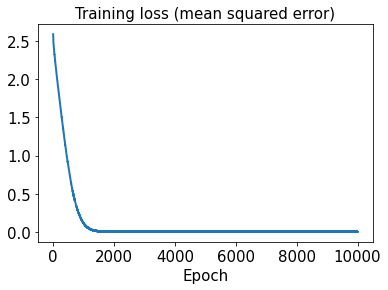

In [34]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

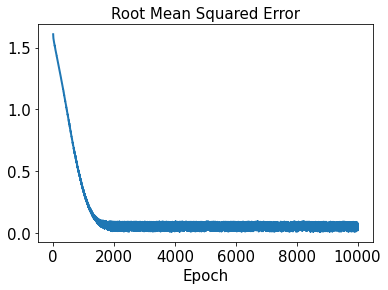

In [35]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [36]:
decoded_sensor_train2 = sensor_pred2.predict(t_train)

In [37]:
decoded_sensor_test2 = sensor_pred2.predict(t_test)

In [38]:
error_train_abs2 = np.abs(decoded_sensor_train2 - x_train2)

In [39]:
error_test_abs2 = np.abs(decoded_sensor_test2 - x_test2)

In [40]:
l2_error_sensor_train2 = np.sqrt(np.sum((decoded_sensor_train2 - x_train2)**2) / np.sum(x_train2**2))
print(l2_error_sensor_train2)

0.24829666731834096


In [41]:
l2_error_sensor_test2 = np.sqrt(np.sum((decoded_sensor_test2 - x_test2)**2) / np.sum(x_test2**2))
print(l2_error_sensor_test2)

0.25951857785452376


In [42]:
error_train_abs2

array([[[5.25221806e-01],
        [6.18503380e-02],
        [4.82519908e-01],
        [2.70170207e-01],
        [1.82518930e-01],
        [6.18890209e-01],
        [5.85539575e-01],
        [9.54656608e-01],
        [2.88850112e-01],
        [9.19737768e-02],
        [2.75961943e-01],
        [4.85233564e-01],
        [5.64191456e-01],
        [4.90156240e-01],
        [2.28215594e-01],
        [3.85235639e-01]],

       [[5.81946067e-01],
        [3.05353622e-01],
        [2.11354284e-01],
        [4.71861584e-01],
        [2.12555933e-02],
        [3.82259459e-01],
        [1.41157823e-01],
        [7.28962357e-01],
        [1.58787401e-01],
        [6.02783842e-01],
        [1.08194304e-02],
        [6.45061207e-02],
        [3.31819820e-02],
        [5.64723063e-02],
        [6.42754364e-02],
        [6.51774216e-02]],

       [[4.59434562e-01],
        [1.49957943e-02],
        [4.51674314e-01],
        [2.59049101e-01],
        [1.16389413e-01],
        [5.43723078e-01],
        

In [43]:
sensor_pred3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start3 = datetime.datetime.now()
history3 = sensor_pred3.fit(t_train, x_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 13ms/step - loss: 3.7822 - rmse: 1.9445
Epoch 2/10000
2/2 [==============================] - 0s 29ms/step - loss: 3.7270 - rmse: 1.9303
Epoch 3/10000
2/2 [==============================] - 0s 19ms/step - loss: 3.6944 - rmse: 1.9218
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6695 - rmse: 1.9153
Epoch 5/10000
2/2 [==============================] - 0s 24ms/step - loss: 3.6529 - rmse: 1.9110
Epoch 6/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6402 - rmse: 1.9077
Epoch 7/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6295 - rmse: 1.9048
Epoch 8/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.6149 - rmse: 1.9010
Epoch 9/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6031 - rmse: 1.8979
Epoch 10/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5973 - rmse: 1.8964
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 9ms/step - loss: 2.9584 - rmse: 1.7197
Epoch 87/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9502 - rmse: 1.7173
Epoch 88/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9419 - rmse: 1.7149
Epoch 89/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9365 - rmse: 1.7133
Epoch 90/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9275 - rmse: 1.7107
Epoch 91/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9200 - rmse: 1.7085
Epoch 92/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9150 - rmse: 1.7070
Epoch 93/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9065 - rmse: 1.7045
Epoch 94/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9034 - rmse: 1.7036
Epoch 95/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8969 - rmse: 1.7017
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 12ms/step - loss: 2.4462 - rmse: 1.5637
Epoch 171/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4359 - rmse: 1.5604
Epoch 172/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4287 - rmse: 1.5581
Epoch 173/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4260 - rmse: 1.5572
Epoch 174/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4173 - rmse: 1.5544
Epoch 175/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4161 - rmse: 1.5541
Epoch 176/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4075 - rmse: 1.5513
Epoch 177/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4035 - rmse: 1.5500
Epoch 178/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3966 - rmse: 1.5478
Epoch 179/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3973 - rmse: 1.5480
Epoch 180/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 2.0362 - rmse: 1.4266
Epoch 255/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0319 - rmse: 1.4251
Epoch 256/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0274 - rmse: 1.4235
Epoch 257/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0218 - rmse: 1.4215
Epoch 258/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0153 - rmse: 1.4193
Epoch 259/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0140 - rmse: 1.4188
Epoch 260/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0096 - rmse: 1.4173
Epoch 261/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0059 - rmse: 1.4160
Epoch 262/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0069 - rmse: 1.4163
Epoch 263/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9952 - rmse: 1.4121
Epoch 264/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 1.7092 - rmse: 1.3070
Epoch 339/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7049 - rmse: 1.3054
Epoch 340/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7034 - rmse: 1.3048
Epoch 341/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6978 - rmse: 1.3026
Epoch 342/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6939 - rmse: 1.3011
Epoch 343/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6943 - rmse: 1.3013
Epoch 344/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6899 - rmse: 1.2996
Epoch 345/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6886 - rmse: 1.2991
Epoch 346/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6850 - rmse: 1.2977
Epoch 347/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6777 - rmse: 1.2949
Epoch 348/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 1.4413 - rmse: 1.2001
Epoch 423/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4397 - rmse: 1.1994
Epoch 424/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4331 - rmse: 1.1967
Epoch 425/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4310 - rmse: 1.1958
Epoch 426/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4312 - rmse: 1.1959
Epoch 427/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4278 - rmse: 1.1945
Epoch 428/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4241 - rmse: 1.1929
Epoch 429/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4213 - rmse: 1.1918
Epoch 430/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4166 - rmse: 1.1898
Epoch 431/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4190 - rmse: 1.1908
Epoch 432/10000
2/2 [===================

2/2 [==============================] - 0s 8ms/step - loss: 1.2205 - rmse: 1.1043
Epoch 507/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.2143 - rmse: 1.1015
Epoch 508/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2127 - rmse: 1.1008
Epoch 509/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2135 - rmse: 1.1011
Epoch 510/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2091 - rmse: 1.0991
Epoch 511/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2073 - rmse: 1.0983
Epoch 512/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2026 - rmse: 1.0962
Epoch 513/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2041 - rmse: 1.0969
Epoch 514/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1978 - rmse: 1.0940
Epoch 515/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1961 - rmse: 1.0932
Epoch 516/10000
2/2 [===================

2/2 [==============================] - 0s 12ms/step - loss: 1.0339 - rmse: 1.0163
Epoch 591/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0256 - rmse: 1.0122
Epoch 592/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0242 - rmse: 1.0116
Epoch 593/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0197 - rmse: 1.0093
Epoch 594/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0164 - rmse: 1.0077
Epoch 595/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0151 - rmse: 1.0070
Epoch 596/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.0119 - rmse: 1.0055
Epoch 597/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0098 - rmse: 1.0044
Epoch 598/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0083 - rmse: 1.0037
Epoch 599/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0072 - rmse: 1.0031
Epoch 600/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 0.8614 - rmse: 0.9276
Epoch 675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8568 - rmse: 0.9251
Epoch 676/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.8547 - rmse: 0.9240
Epoch 677/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8530 - rmse: 0.9231
Epoch 678/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.8529 - rmse: 0.9230
Epoch 679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8532 - rmse: 0.9232
Epoch 680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8504 - rmse: 0.9217
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8476 - rmse: 0.9201
Epoch 682/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.8450 - rmse: 0.9187
Epoch 683/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8458 - rmse: 0.9191
Epoch 684/10000
2/2 [==================

2/2 [==============================] - 0s 10ms/step - loss: 0.7183 - rmse: 0.8470
Epoch 759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7204 - rmse: 0.8482
Epoch 760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7198 - rmse: 0.8478
Epoch 761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7109 - rmse: 0.8426
Epoch 762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7097 - rmse: 0.8419
Epoch 763/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.7114 - rmse: 0.8429
Epoch 764/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7069 - rmse: 0.8402
Epoch 765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7083 - rmse: 0.8410
Epoch 766/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7030 - rmse: 0.8379
Epoch 767/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7087 - rmse: 0.8412
Epoch 768/10000
2/2 [==================

2/2 [==============================] - 0s 8ms/step - loss: 0.5882 - rmse: 0.7663
Epoch 843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5895 - rmse: 0.7672
Epoch 844/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5853 - rmse: 0.7644
Epoch 845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5833 - rmse: 0.7631
Epoch 846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5822 - rmse: 0.7624
Epoch 847/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5808 - rmse: 0.7615
Epoch 848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5823 - rmse: 0.7625
Epoch 849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5790 - rmse: 0.7603
Epoch 850/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5761 - rmse: 0.7584
Epoch 851/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5745 - rmse: 0.7573
Epoch 852/10000
2/2 [===================

2/2 [==============================] - 0s 13ms/step - loss: 0.4869 - rmse: 0.6971
Epoch 927/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4790 - rmse: 0.6914
Epoch 928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4797 - rmse: 0.6919
Epoch 929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4756 - rmse: 0.6890
Epoch 930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4738 - rmse: 0.6877
Epoch 931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4761 - rmse: 0.6893
Epoch 932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4711 - rmse: 0.6857
Epoch 933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4712 - rmse: 0.6857
Epoch 934/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4698 - rmse: 0.6847
Epoch 935/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4684 - rmse: 0.6837
Epoch 936/10000
2/2 [===================

Epoch 1010/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3860 - rmse: 0.6205
Epoch 1011/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3825 - rmse: 0.6177
Epoch 1012/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3821 - rmse: 0.6173
Epoch 1013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3804 - rmse: 0.6160
Epoch 1014/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3856 - rmse: 0.6202
Epoch 1015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3813 - rmse: 0.6167
Epoch 1016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3791 - rmse: 0.6150
Epoch 1017/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3760 - rmse: 0.6124
Epoch 1018/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3761 - rmse: 0.6125
Epoch 1019/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3764 - rmse: 0.6127
Epoch 1020/100

2/2 [==============================] - 0s 8ms/step - loss: 0.3080 - rmse: 0.5541
Epoch 1094/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3069 - rmse: 0.5532
Epoch 1095/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3050 - rmse: 0.5514
Epoch 1096/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3034 - rmse: 0.5499
Epoch 1097/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3012 - rmse: 0.5479
Epoch 1098/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3018 - rmse: 0.5485
Epoch 1099/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3032 - rmse: 0.5498
Epoch 1100/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2986 - rmse: 0.5456
Epoch 1101/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2990 - rmse: 0.5460
Epoch 1102/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3000 - rmse: 0.5469
Epoch 1103/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.2387 - rmse: 0.4876
Epoch 1177/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2369 - rmse: 0.4858
Epoch 1178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2373 - rmse: 0.4862
Epoch 1179/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2339 - rmse: 0.4827
Epoch 1180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2363 - rmse: 0.4852
Epoch 1181/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2342 - rmse: 0.4829
Epoch 1182/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2328 - rmse: 0.4815
Epoch 1183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2319 - rmse: 0.4806
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2313 - rmse: 0.4800
Epoch 1185/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2299 - rmse: 0.4785
Epoch 1186/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.1817 - rmse: 0.4252
Epoch 1260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1786 - rmse: 0.4216
Epoch 1261/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1782 - rmse: 0.4210
Epoch 1262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1773 - rmse: 0.4200
Epoch 1263/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1802 - rmse: 0.4234
Epoch 1264/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1771 - rmse: 0.4197
Epoch 1265/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1757 - rmse: 0.4181
Epoch 1266/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1752 - rmse: 0.4174
Epoch 1267/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1784 - rmse: 0.4213
Epoch 1268/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1757 - rmse: 0.4181
Epoch 1269/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.1413 - rmse: 0.3747
Epoch 1343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1339 - rmse: 0.3647
Epoch 1344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1335 - rmse: 0.3641
Epoch 1345/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1325 - rmse: 0.3627
Epoch 1346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1344 - rmse: 0.3654
Epoch 1347/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1376 - rmse: 0.3698
Epoch 1348/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1332 - rmse: 0.3638
Epoch 1349/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1322 - rmse: 0.3623
Epoch 1350/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1315 - rmse: 0.3613
Epoch 1351/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1299 - rmse: 0.3591
Epoch 1352/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0971 - rmse: 0.3101
Epoch 1426/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0970 - rmse: 0.3099
Epoch 1427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0960 - rmse: 0.3084
Epoch 1428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1025 - rmse: 0.3188
Epoch 1429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0957 - rmse: 0.3080
Epoch 1430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0955 - rmse: 0.3076
Epoch 1431/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0948 - rmse: 0.3064
Epoch 1432/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0935 - rmse: 0.3044
Epoch 1433/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0940 - rmse: 0.3052
Epoch 1434/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0954 - rmse: 0.3074
Epoch 1435/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0729 - rmse: 0.2683
Epoch 1509/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0691 - rmse: 0.2611
Epoch 1510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0716 - rmse: 0.2658
Epoch 1511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0683 - rmse: 0.2595
Epoch 1512/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0718 - rmse: 0.2663
Epoch 1513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0681 - rmse: 0.2593
Epoch 1514/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0712 - rmse: 0.2652
Epoch 1515/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0700 - rmse: 0.2628
Epoch 1516/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0680 - rmse: 0.2590
Epoch 1517/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0668 - rmse: 0.2568
Epoch 1518/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0516 - rmse: 0.2252
Epoch 1592/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0489 - rmse: 0.2190
Epoch 1593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0515 - rmse: 0.2250
Epoch 1594/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0506 - rmse: 0.2230
Epoch 1595/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0486 - rmse: 0.2185
Epoch 1596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0472 - rmse: 0.2153
Epoch 1597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0492 - rmse: 0.2199
Epoch 1598/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0494 - rmse: 0.2202
Epoch 1599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0476 - rmse: 0.2161
Epoch 1600/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0520 - rmse: 0.2260
Epoch 1601/10000
2/2 [========

2/2 [==============================] - 0s 9ms/step - loss: 0.0340 - rmse: 0.1821
Epoch 1675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0331 - rmse: 0.1796
Epoch 1676/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0329 - rmse: 0.1788
Epoch 1677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0325 - rmse: 0.1778
Epoch 1678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0327 - rmse: 0.1784
Epoch 1679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0409 - rmse: 0.2000
Epoch 1680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0345 - rmse: 0.1834
Epoch 1681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0322 - rmse: 0.1770
Epoch 1682/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0319 - rmse: 0.1762
Epoch 1683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0333 - rmse: 0.1800
Epoch 1684/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0233 - rmse: 0.1496
Epoch 1758/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0285 - rmse: 0.1661
Epoch 1759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0234 - rmse: 0.1500
Epoch 1760/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0217 - rmse: 0.1444
Epoch 1761/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0249 - rmse: 0.1551
Epoch 1762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0214 - rmse: 0.1434
Epoch 1763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0248 - rmse: 0.1548
Epoch 1764/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0211 - rmse: 0.1421
Epoch 1765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0220 - rmse: 0.1455
Epoch 1766/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0241 - rmse: 0.1525
Epoch 1767/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0183 - rmse: 0.1322
Epoch 1841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0168 - rmse: 0.1262
Epoch 1842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0206 - rmse: 0.1403
Epoch 1843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0142 - rmse: 0.1157
Epoch 1844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0148 - rmse: 0.1182
Epoch 1845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0145 - rmse: 0.1167
Epoch 1846/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0175 - rmse: 0.1288
Epoch 1847/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0223 - rmse: 0.1463
Epoch 1848/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0149 - rmse: 0.1185
Epoch 1849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0163 - rmse: 0.1242
Epoch 1850/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0088 - rmse: 0.0890
Epoch 1924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0105 - rmse: 0.0983
Epoch 1925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0896
Epoch 1926/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0921
Epoch 1927/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0098 - rmse: 0.0944
Epoch 1928/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0087 - rmse: 0.0888
Epoch 1929/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0100 - rmse: 0.0959
Epoch 1930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0893
Epoch 1931/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0088 - rmse: 0.0890
Epoch 1932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0124 - rmse: 0.1074
Epoch 1933/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0725
Epoch 2007/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0124 - rmse: 0.1077
Epoch 2008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0730
Epoch 2009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0772
Epoch 2010/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0786
Epoch 2011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0702
Epoch 2012/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0689
Epoch 2013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0753
Epoch 2014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0801
Epoch 2015/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0796
Epoch 2016/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0665
Epoch 2090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0784
Epoch 2091/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0768
Epoch 2092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0735
Epoch 2093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0675
Epoch 2094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0577
Epoch 2095/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0727
Epoch 2096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0841
Epoch 2097/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0765
Epoch 2098/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0584
Epoch 2099/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0473
Epoch 2173/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0066 - rmse: 0.0758
Epoch 2174/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0474
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0727
Epoch 2176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0451
Epoch 2177/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0064 - rmse: 0.0745
Epoch 2178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0762
Epoch 2179/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0613
Epoch 2180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0462
Epoch 2181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0725
Epoch 2182/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0373
Epoch 2256/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0054 - rmse: 0.0680
Epoch 2257/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0540
Epoch 2258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0562
Epoch 2259/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0373
Epoch 2260/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0396
Epoch 2261/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0942
Epoch 2262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0564
Epoch 2263/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0495
Epoch 2264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0732
Epoch 2265/10000
2/2 [=========

2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0683
Epoch 2339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0515
Epoch 2340/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0091 - rmse: 0.0910
Epoch 2341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0844
Epoch 2342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0964
Epoch 2343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0516
Epoch 2344/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0311
Epoch 2345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0433
Epoch 2346/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0665
Epoch 2347/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0057 - rmse: 0.0701
Epoch 2348/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0443
Epoch 2422/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0427
Epoch 2423/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0669
Epoch 2424/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0484
Epoch 2425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0826
Epoch 2426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0052 - rmse: 0.0660
Epoch 2427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0886
Epoch 2428/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0613
Epoch 2429/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0452
Epoch 2430/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0530
Epoch 2431/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0223
Epoch 2505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0828
Epoch 2506/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0491
Epoch 2507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0819
Epoch 2508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0654
Epoch 2509/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0449
Epoch 2510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0211
Epoch 2511/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0672
Epoch 2512/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0260
Epoch 2513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0235
Epoch 2514/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0551
Epoch 2588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0296
Epoch 2589/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0233
Epoch 2590/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0426
Epoch 2591/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0825
Epoch 2592/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0592
Epoch 2593/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0284
Epoch 2594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0163
Epoch 2595/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0220
Epoch 2596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0195
Epoch 2597/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0521
Epoch 2671/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0248
Epoch 2672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0208
Epoch 2673/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0306
Epoch 2674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0649
Epoch 2675/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0443
Epoch 2676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0663
Epoch 2677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0544
Epoch 2678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0536
Epoch 2679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0644
Epoch 2680/10000
2/2 [=========

2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0633
Epoch 2754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0661
Epoch 2755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0398
Epoch 2756/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0202
Epoch 2757/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0171
Epoch 2758/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0406
Epoch 2759/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0642
Epoch 2760/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0212
Epoch 2761/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0643
Epoch 2762/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0458
Epoch 2763/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0567
Epoch 2837/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0759
Epoch 2838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0757
Epoch 2839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0513
Epoch 2840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0203
Epoch 2841/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0956
Epoch 2842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0629
Epoch 2843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0275
Epoch 2844/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0270
Epoch 2845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0294
Epoch 2846/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0164
Epoch 2919/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0580
Epoch 2920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0387
Epoch 2921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0393
Epoch 2922/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0185
Epoch 2923/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0350
Epoch 2924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0607
Epoch 2925/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0190
Epoch 2926/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3045e-04 - rmse: 0.0134
Epoch 2927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0586
Epoch 2928/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0335
Epoch 3002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0284
Epoch 3003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0371
Epoch 3004/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0354
Epoch 3005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0885
Epoch 3006/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0400
Epoch 3007/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0556
Epoch 3008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0299
Epoch 3009/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0535
Epoch 3010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0416
Epoch 3011/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0421
Epoch 3085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0213
Epoch 3086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0586
Epoch 3087/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.6665e-04 - rmse: 0.0153
Epoch 3088/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0345
Epoch 3089/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.7499e-04 - rmse: 0.0119
Epoch 3090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0586
Epoch 3091/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.6758e-04 - rmse: 0.0116
Epoch 3092/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0228
Epoch 3093/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0580
Epoch 3094/10000
2/

Epoch 3167/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.1126e-04 - rmse: 0.0136
Epoch 3168/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1952e-04 - rmse: 0.0139
Epoch 3169/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5841e-04 - rmse: 0.0115
Epoch 3170/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8030e-04 - rmse: 0.0124
Epoch 3171/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0447
Epoch 3172/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0170
Epoch 3173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0582
Epoch 3174/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.3784e-04 - rmse: 0.0146
Epoch 3175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0199
Epoch 3176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0

2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0533
Epoch 3250/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0617
Epoch 3251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0484
Epoch 3252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0830
Epoch 3253/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0557
Epoch 3254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0282
Epoch 3255/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0553
Epoch 3256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0440
Epoch 3257/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0627
Epoch 3258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0550
Epoch 3259/10000
2/2 [=========

2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0588
Epoch 3333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0817
Epoch 3334/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0234
Epoch 3335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0178
Epoch 3336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0358
Epoch 3337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0334
Epoch 3338/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0221
Epoch 3339/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0234
Epoch 3340/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0431
Epoch 3341/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0650
Epoch 3342/10000
2/2 [========

2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0327
Epoch 3416/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0332
Epoch 3417/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0613
Epoch 3418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0180
Epoch 3419/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0306
Epoch 3420/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0086 - rmse: 0.0886
Epoch 3421/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0757
Epoch 3422/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0663
Epoch 3423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0310
Epoch 3424/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0423
Epoch 3425/10000
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0470
Epoch 3498/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0426
Epoch 3499/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.5405e-04 - rmse: 0.0127
Epoch 3500/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0943
Epoch 3501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0416
Epoch 3502/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0210
Epoch 3503/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0837
Epoch 3504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0420
Epoch 3505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0638
Epoch 3506/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0482
Epoch 3507/10000
2/2 [====

2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0397
Epoch 3581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0307
Epoch 3582/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0475
Epoch 3583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0939
Epoch 3584/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0486
Epoch 3585/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0410
Epoch 3586/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0202
Epoch 3587/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4493e-04 - rmse: 0.0126
Epoch 3588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0402
Epoch 3589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0558
Epoch 3590/10000
2/2 [====

2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0195
Epoch 3664/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0182
Epoch 3665/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1434e-04 - rmse: 0.0117
Epoch 3666/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4634e-04 - rmse: 0.0130
Epoch 3667/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0590
Epoch 3668/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6628e-04 - rmse: 0.0170
Epoch 3669/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0637
Epoch 3670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0334
Epoch 3671/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2465e-04 - rmse: 0.0157
Epoch 3672/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0760
Epoch 3673/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0224
Epoch 3746/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0326
Epoch 3747/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0452e-04 - rmse: 0.0153
Epoch 3748/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0606
Epoch 3749/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0406
Epoch 3750/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.1566e-04 - rmse: 0.0157
Epoch 3751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0220
Epoch 3752/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0610
Epoch 3753/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0935
Epoch 3754/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0246
Epoch 3755/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0762
Epoch 3828/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0207
Epoch 3829/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0645
Epoch 3830/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0668
Epoch 3831/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0668
Epoch 3832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0569
Epoch 3833/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0051 - rmse: 0.0666
Epoch 3834/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0821
Epoch 3835/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0197
Epoch 3836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0229
Epoch 3837/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0290
Epoch 3910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0423
Epoch 3911/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0429
Epoch 3912/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0203
Epoch 3913/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0499
Epoch 3914/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0582
Epoch 3915/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0811
Epoch 3916/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0379
Epoch 3917/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0438
Epoch 3918/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0588e-04 - rmse: 0.0158
Epoch 3919/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0619
Epoch 3992/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0228
Epoch 3993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0414
Epoch 3994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0898
Epoch 3995/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0477
Epoch 3996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0950
Epoch 3997/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0651
Epoch 3998/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0410
Epoch 3999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0602
Epoch 4000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0378
Epoch 4001/10000
2/2 [========

2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0378
Epoch 4075/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0329
Epoch 4076/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0409
Epoch 4077/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0339
Epoch 4078/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0599
Epoch 4079/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0489
Epoch 4080/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0428
Epoch 4081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0265
Epoch 4082/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0673
Epoch 4083/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0549
Epoch 4084/10000
2/2 [==============

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0275
Epoch 4158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0611
Epoch 4159/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0482
Epoch 4160/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - rmse: 0.0951
Epoch 4161/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0407
Epoch 4162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0213
Epoch 4163/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0788
Epoch 4164/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0281
Epoch 4165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0385
Epoch 4166/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0573
Epoch 4167/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0282
Epoch 4240/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0435
Epoch 4241/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0751
Epoch 4242/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0390
Epoch 4243/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0441
Epoch 4244/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.8750e-04 - rmse: 0.0190
Epoch 4245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0227
Epoch 4246/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.1646e-04 - rmse: 0.0138
Epoch 4247/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0662
Epoch 4248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0561
Epoch 4249/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0549
Epoch 4322/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0228
Epoch 4323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0250
Epoch 4324/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0202
Epoch 4325/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0408
Epoch 4326/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0265
Epoch 4327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0645
Epoch 4328/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0229
Epoch 4329/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0950
Epoch 4330/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0424
Epoch 4331/10000
2/2 [========

2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0229
Epoch 4404/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4616e-04 - rmse: 0.0153
Epoch 4405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0662
Epoch 4406/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0607
Epoch 4407/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0398
Epoch 4408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0584
Epoch 4409/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0361
Epoch 4410/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0320
Epoch 4411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0594
Epoch 4412/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0884
Epoch 4413/10000
2/2 [====

2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0748
Epoch 4487/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0423
Epoch 4488/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0414
Epoch 4489/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4588e-04 - rmse: 0.0155
Epoch 4490/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0631
Epoch 4491/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0071 - rmse: 0.0808
Epoch 4492/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0587
Epoch 4493/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0284
Epoch 4494/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0653
Epoch 4495/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0579
Epoch 4496/10000
2/2 [======

2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0494
Epoch 4570/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0464
Epoch 4571/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0583
Epoch 4572/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0492
Epoch 4573/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0491
Epoch 4574/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0432
Epoch 4575/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2114e-04 - rmse: 0.0149
Epoch 4576/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0519
Epoch 4577/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0432
Epoch 4578/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0650
Epoch 4579/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0392
Epoch 4653/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.9514e-04 - rmse: 0.0174
Epoch 4654/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0357
Epoch 4655/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0094 - rmse: 0.0939
Epoch 4656/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0246
Epoch 4657/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0524
Epoch 4658/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0645
Epoch 4659/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0606
Epoch 4660/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0218
Epoch 4661/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8230e-04 - rmse: 0.0171
Epoch 4662/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 8.1712e-04 - rmse: 0.0152
Epoch 4736/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0634
Epoch 4737/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6218e-04 - rmse: 0.0194
Epoch 4738/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0463
Epoch 4739/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0327
Epoch 4740/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.9942e-04 - rmse: 0.0107
Epoch 4741/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0318
Epoch 4742/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9488e-04 - rmse: 0.0176
Epoch 4743/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0437
Epoch 4744/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0307
Epoch 4745/10000

2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0318
Epoch 4818/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7094e-04 - rmse: 0.0139
Epoch 4819/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0494
Epoch 4820/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0546
Epoch 4821/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0460
Epoch 4822/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0370
Epoch 4823/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0304
Epoch 4824/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0378
Epoch 4825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0549
Epoch 4826/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0574
Epoch 4827/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0380
Epoch 4900/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0321
Epoch 4901/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0439
Epoch 4902/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0552
Epoch 4903/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0626
Epoch 4904/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0411
Epoch 4905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0574
Epoch 4906/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0874
Epoch 4907/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0549
Epoch 4908/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.1770e-04 - rmse: 0.0121
Epoch 4909/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0654
Epoch 4982/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0663
Epoch 4983/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.7664e-04 - rmse: 0.0176
Epoch 4984/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0825
Epoch 4985/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0441
Epoch 4986/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0298
Epoch 4987/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0255
Epoch 4988/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0332
Epoch 4989/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0500
Epoch 4990/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3288e-04 - rmse: 0.0163
Epoch 4991/10000
2/2 [

2/2 [==============================] - 0s 7ms/step - loss: 7.6348e-04 - rmse: 0.0142
Epoch 5064/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0630
Epoch 5065/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0871
Epoch 5066/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0218
Epoch 5067/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0581
Epoch 5068/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0948
Epoch 5069/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0815
Epoch 5070/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0549
Epoch 5071/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0585
Epoch 5072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0590
Epoch 5073/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0320
Epoch 5146/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0317
Epoch 5147/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7038e-04 - rmse: 0.0147
Epoch 5148/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7519e-04 - rmse: 0.0110
Epoch 5149/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0495
Epoch 5150/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5645e-04 - rmse: 0.0142
Epoch 5151/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0490
Epoch 5152/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0522
Epoch 5153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0745
Epoch 5154/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4811e-04 - rmse: 0.0171
Epoch 5155/100

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0586
Epoch 5228/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2522e-04 - rmse: 0.0194
Epoch 5229/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0560
Epoch 5230/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.9059e-04 - rmse: 0.0185
Epoch 5231/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0551
Epoch 5232/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0527
Epoch 5233/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0632
Epoch 5234/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0809
Epoch 5235/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0747
Epoch 5236/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0414
Epoch 5237/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0276
Epoch 5310/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0532
Epoch 5311/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0545
Epoch 5312/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0663
Epoch 5313/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0093 - rmse: 0.0938
Epoch 5314/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0482
Epoch 5315/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0234
Epoch 5316/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0972
Epoch 5317/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0588
Epoch 5318/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0301
Epoch 5319/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0636
Epoch 5392/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4126e-04 - rmse: 0.0143
Epoch 5393/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0604
Epoch 5394/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0547
Epoch 5395/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0433
Epoch 5396/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.7444e-04 - rmse: 0.0184
Epoch 5397/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0605
Epoch 5398/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3149e-04 - rmse: 0.0140
Epoch 5399/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0747
Epoch 5400/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0218
Epoch 5401/10000
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 9.6161e-04 - rmse: 0.0208
Epoch 5475/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0524
Epoch 5476/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0631
Epoch 5477/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8027e-04 - rmse: 0.0122
Epoch 5478/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0654
Epoch 5479/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0493
Epoch 5480/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0517
Epoch 5481/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0601
Epoch 5482/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0633
Epoch 5483/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0381
Epoch 5484/10000
2/2 [======

2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0871
Epoch 5557/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0448
Epoch 5558/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0748
Epoch 5559/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0494
Epoch 5560/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0653
Epoch 5561/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0345
Epoch 5562/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0284
Epoch 5563/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4124e-04 - rmse: 0.0108
Epoch 5564/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.2129e-04 - rmse: 0.0199
Epoch 5565/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0499
Epoch 5566/10000
2/2 [=

2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0635
Epoch 5639/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0603
Epoch 5640/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0575
Epoch 5641/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8099e-04 - rmse: 0.0215
Epoch 5642/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0420
Epoch 5643/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4358e-04 - rmse: 0.0206
Epoch 5644/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.6352e-04 - rmse: 0.0186
Epoch 5645/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0874
Epoch 5646/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0498
Epoch 5647/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0805
Epoch 5648/10000
2/2 [==

2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0285
Epoch 5721/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0631
Epoch 5722/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0405
Epoch 5723/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0488
Epoch 5724/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0097 - rmse: 0.0957
Epoch 5725/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0785
Epoch 5726/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0075 - rmse: 0.0835
Epoch 5727/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0674
Epoch 5728/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0313
Epoch 5729/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0298
Epoch 5730/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0256
Epoch 5804/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0228
Epoch 5805/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0542
Epoch 5806/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0424
Epoch 5807/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9964e-04 - rmse: 0.0198
Epoch 5808/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0607
Epoch 5809/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4670e-04 - rmse: 0.0155
Epoch 5810/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0382
Epoch 5811/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0049 - rmse: 0.0666
Epoch 5812/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0640
Epoch 5813/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 8.9674e-04 - rmse: 0.0199
Epoch 5886/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.2246e-04 - rmse: 0.0205
Epoch 5887/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0614
Epoch 5888/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0449
Epoch 5889/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0579
Epoch 5890/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0546
Epoch 5891/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0583
Epoch 5892/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0526
Epoch 5893/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4832e-04 - rmse: 0.0122
Epoch 5894/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0633
Epoch 5895/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0339
Epoch 5968/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0063 - rmse: 0.0759
Epoch 5969/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0562
Epoch 5970/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0423
Epoch 5971/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6815e-04 - rmse: 0.0165
Epoch 5972/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0097 - rmse: 0.0958
Epoch 5973/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0410
Epoch 5974/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0618
Epoch 5975/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0454
Epoch 5976/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0337
Epoch 5977/10000
2/2 [====

2/2 [==============================] - 0s 7ms/step - loss: 7.8699e-04 - rmse: 0.0173
Epoch 6050/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0573
Epoch 6051/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0094 - rmse: 0.0946
Epoch 6052/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0568
Epoch 6053/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9112e-04 - rmse: 0.0201
Epoch 6054/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0427
Epoch 6055/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0630
Epoch 6056/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0283
Epoch 6057/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7908e-04 - rmse: 0.0222
Epoch 6058/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0267
Epoch 6059/10000
2/2 [===

2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0337
Epoch 6132/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0419
Epoch 6133/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0297
Epoch 6134/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7907e-04 - rmse: 0.0140
Epoch 6135/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0050e-04 - rmse: 0.0148
Epoch 6136/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5338e-04 - rmse: 0.0217
Epoch 6137/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0813
Epoch 6138/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0868
Epoch 6139/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0274
Epoch 6140/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0467
Epoch 6141/10000
2/2

2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0377
Epoch 6214/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0092 - rmse: 0.0933
Epoch 6215/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0359
Epoch 6216/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0604
Epoch 6217/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4467e-04 - rmse: 0.0129
Epoch 6218/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0526
Epoch 6219/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0548
Epoch 6220/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0412
Epoch 6221/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0306
Epoch 6222/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0815
Epoch 6223/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0524
Epoch 6296/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0094 - rmse: 0.0943
Epoch 6297/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0590
Epoch 6298/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0384
Epoch 6299/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4508e-04 - rmse: 0.0165
Epoch 6300/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5648e-04 - rmse: 0.0169
Epoch 6301/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0440
Epoch 6302/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0808
Epoch 6303/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0337
Epoch 6304/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0633
Epoch 6305/10000
2/2 [=======

2/2 [==============================] - 0s 11ms/step - loss: 9.4476e-04 - rmse: 0.0219
Epoch 6378/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4671e-04 - rmse: 0.0219
Epoch 6379/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0555
Epoch 6380/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0493
Epoch 6381/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0934
Epoch 6382/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0439
Epoch 6383/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0439
Epoch 6384/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0528
Epoch 6385/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0427
Epoch 6386/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0933
Epoch 6387/10000
2/2 [====

2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0494
Epoch 6460/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0405
Epoch 6461/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0465
Epoch 6462/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5714e-04 - rmse: 0.0172
Epoch 6463/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0442
Epoch 6464/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0312
Epoch 6465/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3122e-04 - rmse: 0.0131
Epoch 6466/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7734e-04 - rmse: 0.0108
Epoch 6467/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0426
Epoch 6468/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0816
Epoch 6469/10000
2/2 [===

2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0522
Epoch 6542/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.9338e-04 - rmse: 0.0184
Epoch 6543/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0567e-04 - rmse: 0.0158
Epoch 6544/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0318
Epoch 6545/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8891e-04 - rmse: 0.0116
Epoch 6546/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0524
Epoch 6547/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0251e-04 - rmse: 0.0212
Epoch 6548/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2194e-04 - rmse: 0.0082
Epoch 6549/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0876
Epoch 6550/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0496
Epoch 6551/1000

2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0647
Epoch 6624/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1520e-04 - rmse: 0.0163
Epoch 6625/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0360
Epoch 6626/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0613
Epoch 6627/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0531
Epoch 6628/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0638
Epoch 6629/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0395
Epoch 6630/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0648
Epoch 6631/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0618
Epoch 6632/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6409e-04 - rmse: 0.0177
Epoch 6633/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0400
Epoch 6707/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0491
Epoch 6708/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.6197e-04 - rmse: 0.0178
Epoch 6709/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0564
Epoch 6710/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0398
Epoch 6711/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0591
Epoch 6712/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6167e-04 - rmse: 0.0178
Epoch 6713/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1859e-04 - rmse: 0.0194
Epoch 6714/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0242
Epoch 6715/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0406
Epoch 6716/10000
2/2 [==

2/2 [==============================] - 0s 12ms/step - loss: 6.2633e-04 - rmse: 0.0137
Epoch 6789/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0653
Epoch 6790/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0749
Epoch 6791/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5560e-04 - rmse: 0.0228
Epoch 6792/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0871
Epoch 6793/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0519
Epoch 6794/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4334e-04 - rmse: 0.0143
Epoch 6795/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0816
Epoch 6796/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2068e-04 - rmse: 0.0091
Epoch 6797/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0417
Epoch 6798/10000
2

2/2 [==============================] - 0s 9ms/step - loss: 6.7635e-04 - rmse: 0.0156
Epoch 6872/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0523
Epoch 6873/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0310
Epoch 6874/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0462
Epoch 6875/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0276
Epoch 6876/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0345
Epoch 6877/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0632
Epoch 6878/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0495
Epoch 6879/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0624
Epoch 6880/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0404
Epoch 6881/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0778
Epoch 6955/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0580
Epoch 6956/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0286
Epoch 6957/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0528
Epoch 6958/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0445
Epoch 6959/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0605
Epoch 6960/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5541e-04 - rmse: 0.0230
Epoch 6961/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0462
Epoch 6962/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0460
Epoch 6963/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0777
Epoch 6964/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0368
Epoch 7038/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0519
Epoch 7039/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0411
Epoch 7040/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0601
Epoch 7041/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6103e-04 - rmse: 0.0210
Epoch 7042/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0753
Epoch 7043/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0315
Epoch 7044/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.9421e-04 - rmse: 0.0166
Epoch 7045/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0351
Epoch 7046/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0527
Epoch 7047/10000
2/2 [===

2/2 [==============================] - 0s 11ms/step - loss: 5.6783e-04 - rmse: 0.0124
Epoch 7120/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.4918e-04 - rmse: 0.0183
Epoch 7121/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8450e-04 - rmse: 0.0083
Epoch 7122/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.5261e-04 - rmse: 0.0154
Epoch 7123/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.0668e-04 - rmse: 0.0171
Epoch 7124/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.6019e-04 - rmse: 0.0186
Epoch 7125/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.0046e-04 - rmse: 0.0169
Epoch 7126/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0372
Epoch 7127/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0399
Epoch 7128/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0429
Epoc

2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0569
Epoch 7202/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.1946e-04 - rmse: 0.0176
Epoch 7203/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0670
Epoch 7204/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0592
Epoch 7205/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0458
Epoch 7206/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0651
Epoch 7207/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0621
Epoch 7208/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0764
Epoch 7209/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0453
Epoch 7210/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0433
Epoch 7211/10000
2/2 [=====

2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0873
Epoch 7284/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0553
Epoch 7285/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0323
Epoch 7286/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0372
Epoch 7287/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3454e-04 - rmse: 0.0152
Epoch 7288/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7680e-04 - rmse: 0.0086
Epoch 7289/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0377
Epoch 7290/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0279
Epoch 7291/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0408
Epoch 7292/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9155e-04 - rmse: 0.0137
Epoch 7293/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0646
Epoch 7366/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0561
Epoch 7367/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0755
Epoch 7368/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.3302e-04 - rmse: 0.0153
Epoch 7369/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0642
Epoch 7370/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4302e-04 - rmse: 0.0121
Epoch 7371/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0636
Epoch 7372/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0376
Epoch 7373/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0418
Epoch 7374/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0812
Epoch 7375/10000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 4.9637e-04 - rmse: 0.0102
Epoch 7448/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.7968e-04 - rmse: 0.0137
Epoch 7449/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.3865e-04 - rmse: 0.0068
Epoch 7450/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0418
Epoch 7451/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0091 - rmse: 0.0935
Epoch 7452/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0750
Epoch 7453/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5274e-04 - rmse: 0.0190
Epoch 7454/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4653e-04 - rmse: 0.0124
Epoch 7455/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0660
Epoch 7456/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0609
Epoch 7457/

2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0493
Epoch 7530/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0523
Epoch 7531/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0079 - rmse: 0.0867
Epoch 7532/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0504
Epoch 7533/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0805
Epoch 7534/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0400
Epoch 7535/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0936
Epoch 7536/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0090 - rmse: 0.0930
Epoch 7537/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0756
Epoch 7538/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5858e-04 - rmse: 0.0165
Epoch 7539/10000
2/2 [====

2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0965
Epoch 7612/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0642
Epoch 7613/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0444
Epoch 7614/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0416
Epoch 7615/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0351
Epoch 7616/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0358
Epoch 7617/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8644e-04 - rmse: 0.0175
Epoch 7618/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3701e-04 - rmse: 0.0189
Epoch 7619/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0618
Epoch 7620/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0529
Epoch 7621/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0875
Epoch 7694/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0255
Epoch 7695/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0288
Epoch 7696/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0780
Epoch 7697/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0750
Epoch 7698/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0092 - rmse: 0.0937
Epoch 7699/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0304
Epoch 7700/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0658
Epoch 7701/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0894
Epoch 7702/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0526
Epoch 7703/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 4.4863e-04 - rmse: 0.0088
Epoch 7776/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2975e-04 - rmse: 0.0236
Epoch 7777/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.8987e-04 - rmse: 0.0148
Epoch 7778/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0493
Epoch 7779/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0549
Epoch 7780/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0575
Epoch 7781/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0489
Epoch 7782/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9859e-04 - rmse: 0.0113
Epoch 7783/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0372
Epoch 7784/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0878
Epoch 7785/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0348
Epoch 7858/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9128e-04 - rmse: 0.0181
Epoch 7859/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0387
Epoch 7860/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0384
Epoch 7861/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0811
Epoch 7862/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0932
Epoch 7863/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0448
Epoch 7864/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0604
Epoch 7865/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0305
Epoch 7866/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9775e-04 - rmse: 0.0183
Epoch 7867/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0522
Epoch 7940/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0433
Epoch 7941/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.5072e-04 - rmse: 0.0222
Epoch 7942/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1348e-04 - rmse: 0.0124
Epoch 7943/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0584
Epoch 7944/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0312
Epoch 7945/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0583
Epoch 7946/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0552
Epoch 7947/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0080 - rmse: 0.0875
Epoch 7948/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0636
Epoch 7949/10000
2/2 [

2/2 [==============================] - 0s 7ms/step - loss: 6.5082e-04 - rmse: 0.0172
Epoch 8022/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0383
Epoch 8023/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.2336e-04 - rmse: 0.0217
Epoch 8024/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8469e-04 - rmse: 0.0114
Epoch 8025/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0539
Epoch 8026/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0443
Epoch 8027/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8718e-04 - rmse: 0.0208
Epoch 8028/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0415
Epoch 8029/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0551
Epoch 8030/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5841e-04 - rmse: 0.0143
Epoch 8031/

2/2 [==============================] - 0s 13ms/step - loss: 0.0091 - rmse: 0.0937
Epoch 8104/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0755
Epoch 8105/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0091 - rmse: 0.0934
Epoch 8106/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0501
Epoch 8107/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 8108/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2844e-04 - rmse: 0.0134
Epoch 8109/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0497
Epoch 8110/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0465
Epoch 8111/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0381
Epoch 8112/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8439e-04 - rmse: 0.0117
Epoch 8113/10000
2/2 [

2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0877
Epoch 8186/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7831e-04 - rmse: 0.0153
Epoch 8187/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.3916e-04 - rmse: 0.0223
Epoch 8188/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0427
Epoch 8189/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0879
Epoch 8190/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0587
Epoch 8191/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0585
Epoch 8192/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0604
Epoch 8193/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0579
Epoch 8194/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0811
Epoch 8195/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 6.1780e-04 - rmse: 0.0167
Epoch 8268/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0439
Epoch 8269/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0383
Epoch 8270/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0638
Epoch 8271/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0752
Epoch 8272/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0638
Epoch 8273/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 8274/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2465e-04 - rmse: 0.0221
Epoch 8275/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0387
Epoch 8276/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0754
Epoch 8277/10000
2/2 [

2/2 [==============================] - 0s 12ms/step - loss: 8.7010e-04 - rmse: 0.0232
Epoch 8350/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0830
Epoch 8351/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - rmse: 0.0554
Epoch 8352/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0768
Epoch 8353/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0828
Epoch 8354/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0503
Epoch 8355/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0625
Epoch 8356/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0457
Epoch 8357/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0383
Epoch 8358/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0887
Epoch 8359/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0396
Epoch 8432/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8137e-04 - rmse: 0.0188
Epoch 8433/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7785e-04 - rmse: 0.0123
Epoch 8434/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0442
Epoch 8435/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3590e-04 - rmse: 0.0226
Epoch 8436/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0603
Epoch 8437/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 8438/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0409
Epoch 8439/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0549
Epoch 8440/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0385
Epoch 8441/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0295
Epoch 8514/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0535
Epoch 8515/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.7350e-04 - rmse: 0.0235
Epoch 8516/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0479
Epoch 8517/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0324
Epoch 8518/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0387
Epoch 8519/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0821
Epoch 8520/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.8896e-04 - rmse: 0.0163
Epoch 8521/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1866e-04 - rmse: 0.0244
Epoch 8522/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0420
Epoch 8523/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0427
Epoch 8596/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0651
Epoch 8597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0637
Epoch 8598/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0500
Epoch 8599/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0575
Epoch 8600/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 8601/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0432
Epoch 8602/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1171e-04 - rmse: 0.0097
Epoch 8603/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0493
Epoch 8604/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0091 - rmse: 0.0935
Epoch 8605/10000
2/2 [====

2/2 [==============================] - 0s 8ms/step - loss: 6.1557e-04 - rmse: 0.0174
Epoch 8678/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 8679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0630
Epoch 8680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0630
Epoch 8681/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.8837e-04 - rmse: 0.0166
Epoch 8682/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0324
Epoch 8683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0818
Epoch 8684/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0525
Epoch 8685/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0582
Epoch 8686/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1814e-04 - rmse: 0.0202
Epoch 8687/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 3.9877e-04 - rmse: 0.0096
Epoch 8760/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.3051e-04 - rmse: 0.0180
Epoch 8761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 8762/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0432
Epoch 8763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0272
Epoch 8764/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0521
Epoch 8765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0430
Epoch 8766/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0519
Epoch 8767/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0368
Epoch 8768/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0270
Epoch 8769/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 8842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0605
Epoch 8843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0528
Epoch 8844/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0551
Epoch 8845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 8846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0412
Epoch 8847/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0372
Epoch 8848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0869
Epoch 8849/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0330
Epoch 8850/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0808
Epoch 8851/10000
2/2 [========

2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0599
Epoch 8924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0599
Epoch 8925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0459
Epoch 8926/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0322
Epoch 8927/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0653
Epoch 8928/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0600
Epoch 8929/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 8930/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 8931/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.1274e-04 - rmse: 0.0108
Epoch 8932/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0557
Epoch 8933/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0558
Epoch 9006/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0375
Epoch 9007/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0371
Epoch 9008/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0520
Epoch 9009/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0870
Epoch 9010/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0419
Epoch 9011/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0545e-04 - rmse: 0.0177
Epoch 9012/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0371
Epoch 9013/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0603
Epoch 9014/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.2320e-04 - rmse: 0.0152
Epoch 9015/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0746
Epoch 9088/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0433
Epoch 9089/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0624
Epoch 9090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0573
Epoch 9091/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 9092/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0370
Epoch 9093/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 9094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0871
Epoch 9095/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0634
Epoch 9096/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0322
Epoch 9097/10000
2/2 [========

2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0521
Epoch 9170/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0353
Epoch 9171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0874
Epoch 9172/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0583
Epoch 9173/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0528
Epoch 9174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0314
Epoch 9175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0590
Epoch 9176/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.4734e-04 - rmse: 0.0129
Epoch 9177/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2891e-04 - rmse: 0.0122
Epoch 9178/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.3949e-04 - rmse: 0.0189
Epoch 9179/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0279
Epoch 9252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 9253/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5514e-04 - rmse: 0.0089
Epoch 9254/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4686e-04 - rmse: 0.0084
Epoch 9255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0466
Epoch 9256/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0806
Epoch 9257/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0414
Epoch 9258/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0521
Epoch 9259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0632
Epoch 9260/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0520
Epoch 9261/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 5.3027e-04 - rmse: 0.0161
Epoch 9334/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0638
Epoch 9335/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0552
Epoch 9336/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0580
Epoch 9337/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0423
Epoch 9338/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0656
Epoch 9339/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0580
Epoch 9340/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8360e-04 - rmse: 0.0226
Epoch 9341/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2385e-04 - rmse: 0.0124
Epoch 9342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0411
Epoch 9343/10000
2

2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0412
Epoch 9416/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6755e-04 - rmse: 0.0142
Epoch 9417/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0662
Epoch 9418/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0472
Epoch 9419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0532
Epoch 9420/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9587e-04 - rmse: 0.0207
Epoch 9421/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4645e-04 - rmse: 0.0195
Epoch 9422/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 9423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0436
Epoch 9424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 9425/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0315
Epoch 9498/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0672
Epoch 9499/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.5482e-04 - rmse: 0.0198
Epoch 9500/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0542
Epoch 9501/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3547e-04 - rmse: 0.0240
Epoch 9502/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9134e-04 - rmse: 0.0207
Epoch 9503/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.7873e-04 - rmse: 0.0178
Epoch 9504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 9505/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0536
Epoch 9506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0760
Epoch 9507/100

2/2 [==============================] - 0s 12ms/step - loss: 4.3840e-04 - rmse: 0.0135
Epoch 9580/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7652e-04 - rmse: 0.0109
Epoch 9581/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0660
Epoch 9582/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0443
Epoch 9583/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0388
Epoch 9584/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0386
Epoch 9585/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8998e-04 - rmse: 0.0153
Epoch 9586/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0441
Epoch 9587/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4774e-04 - rmse: 0.0198
Epoch 9588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0455
Epoch 9589/100

2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 9662/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0604
Epoch 9663/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2649e-04 - rmse: 0.0132
Epoch 9664/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7217e-04 - rmse: 0.0110
Epoch 9665/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0468
Epoch 9666/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 9667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0280
Epoch 9668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0526
Epoch 9669/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.0044e-04 - rmse: 0.0122
Epoch 9670/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0059 - rmse: 0.0750
Epoch 9671/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 9.6450e-04 - rmse: 0.0268
Epoch 9744/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0629
Epoch 9745/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.1244e-04 - rmse: 0.0081
Epoch 9746/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5204e-04 - rmse: 0.0266
Epoch 9747/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0874
Epoch 9748/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 9749/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0649
Epoch 9750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 9751/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7050e-04 - rmse: 0.0111
Epoch 9752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0090 - rmse: 0.0937
Epoch 9753/1000

2/2 [==============================] - 0s 11ms/step - loss: 6.2027e-04 - rmse: 0.0194
Epoch 9826/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0091 - rmse: 0.0942
Epoch 9827/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0940
Epoch 9828/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0452
Epoch 9829/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0512
Epoch 9830/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.4447e-04 - rmse: 0.0245
Epoch 9831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0538
Epoch 9832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0555
Epoch 9833/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0427
Epoch 9834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0473
Epoch 9835/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 5.5845e-04 - rmse: 0.0179
Epoch 9908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0511
Epoch 9909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 9910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0400
Epoch 9911/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0431
Epoch 9912/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6793e-04 - rmse: 0.0182
Epoch 9913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0889
Epoch 9914/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0676
Epoch 9915/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0578
Epoch 9916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0523
Epoch 9917/10000
2/2 [=

2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0312
Epoch 9990/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0633
Epoch 9991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 9992/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0508
Epoch 9993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0973
Epoch 9994/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0571
Epoch 9995/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0557
Epoch 9996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0321
Epoch 9997/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 9998/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0682
Epoch 9999/10000
2/2 [========

In [45]:
time3_sensor = end3 - start3
print("Training time (Case 3, sensor prediction):", time3_sensor)

Training time (Case 3, sensor prediction): 0:03:34.706450


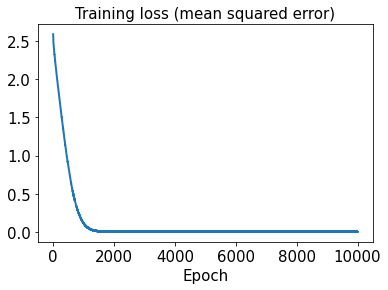

In [46]:
hist3 = history3.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

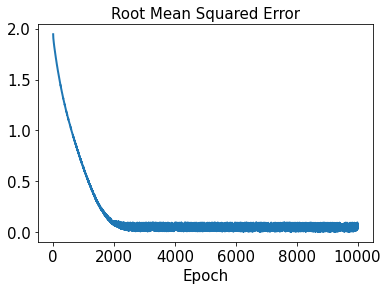

In [47]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
decoded_sensor_train3 = sensor_pred3.predict(t_train)

In [49]:
decoded_sensor_test3 = sensor_pred3.predict(t_test)

In [50]:
error_train_abs3 = np.abs(decoded_sensor_train3 - x_train3)

In [51]:
error_test_abs3 = np.abs(decoded_sensor_test3 - x_test3)

In [52]:
error_train_abs3

array([[[3.65631877e-02],
        [1.20945622e-01],
        [9.73940028e-02],
        [5.01141115e-03],
        [5.96891892e-02],
        [4.83647973e-02],
        [7.73436370e-02],
        [5.43759553e-02],
        [2.05777786e-02],
        [4.39210032e-02],
        [4.49892203e-02],
        [6.62770038e-03],
        [1.46330662e-01],
        [2.90866909e-02],
        [6.36739347e-02],
        [6.72706389e-02]],

       [[9.70703446e-03],
        [1.91245137e-01],
        [1.17474161e-01],
        [2.59382881e-02],
        [1.09578399e-01],
        [1.15465453e-01],
        [3.06730950e-01],
        [2.90812084e-03],
        [1.40531556e-02],
        [1.32957293e-01],
        [4.38007807e-02],
        [3.17179852e-02],
        [1.25901996e-02],
        [4.96966368e-02],
        [1.56092302e-02],
        [7.84790797e-02]],

       [[3.83621474e-02],
        [8.75692854e-02],
        [6.64692962e-02],
        [4.55578958e-03],
        [4.26973635e-02],
        [3.69022469e-02],
        

In [53]:
l2_error_sensor_train3 = np.sqrt(np.sum((decoded_sensor_train3 - x_train3)**2) / np.sum(x_train3**2))
print(l2_error_sensor_train3)

0.12004242471124275


In [54]:
l2_error_sensor_test3 = np.sqrt(np.sum((decoded_sensor_test3 - x_test3)**2) / np.sum(x_test3**2))
print(l2_error_sensor_test3)

0.12643119726456173
